<a href="https://colab.research.google.com/github/shantanumokhale/Zomato_Restaurant_Clustering-12/blob/main/ZOMATO_RESTAURANT_CLUSTERING_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -ZOMATO RESTAURANT CLUSTERING



##### **Project Type**    - Unsupervised ML

##### **Contribution**    - Individual
##### **Shantnau Mokhale**

# **Project Summary**

Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities.

India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity. Restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city. So, this project focuses on analysing the Zomato restaurant data for each city in India.

The Project focuses on Customers and Company, you have  to analyze the sentiments of the reviews given by the customer in the data and made some useful conclusion in the form of Visualizations. Also, cluster the zomato restaurants into different segments. The data is vizualized as it becomes easy to analyse data at instant. The Analysis also solve some of the business cases that can directly help the customers finding the Best restaurant in their locality and for the company to grow up and work on the fields they are currently lagging in.

This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis

Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry.

# **GitHub Link -**

https://github.com/shantanumokhale/Zomato_Restaurant_Clustering

# **Problem Statement**


Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities.

India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity. Restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city. So, this project focuses on analysing the Zomato restaurant data for each city in India.

The Project focuses on Customers and Company, you have to analyze the sentiments of the reviews given by the customer in the data and made some useful conclusion in the form of Visualizations. Also, cluster the zomato restaurants into different segments. The data is vizualized as it becomes easy to analyse data at instant. The Analysis also solve some of the business cases that can directly help the customers finding the Best restaurant in their locality and for the company to grow up and work on the fields they are currently lagging in.

This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis

Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry.

# **Attribute Information**

## **Zomato Restaurant names and Metadata**
Use this dataset for clustering part

1. Name : Name of Restaurants

2. Links : URL Links of Restaurants

3. Cost : Per person estimated Cost of dining

4. Collection : Tagging of Restaurants w.r.t. Zomato categories

5. Cuisines : Cuisines served by Restaurants

6. Timings : Restaurant Timings

## **Zomato Restaurant reviews**
Merge this dataset with Names and Matadata and then use for sentiment analysis part

1. Restaurant : Name of the Restaurant

2. Reviewer : Name of the Reviewer

3. Review : Review Text

4. Rating : Rating Provided by Reviewer

5. MetaData : Reviewer Metadata - No. of Reviews and followers

6. Time: Date and Time of Review

7. Pictures : No. of pictures posted with review

# ***Let's Begin !***

## ***1. Know Your Data***

---
# Importing Libraries
---

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import time
from wordcloud import WordCloud

!pip install --upgrade scikit-learn
import sklearn
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, plot_precision_recall_curve

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set_style("whitegrid", {'grid.linestyle': '--'})

In [ ]:
# Set the display figure size using rcParams method
sns.set(rc={'figure.figsize':(10,6)})
plt.rcParams['figure.figsize'] = [10,6]

In [ ]:
# Load Dataset
meta_df = pd.read_csv('/content/Zomato Restaurant names and Metadata.csv')
reviews_df = pd.read_csv('/content/Zomato Restaurant reviews.csv')

---
# Dataset inspection
---

## Meta Data

In [ ]:
# to get the first five rows of the data set
meta_df.head()

Name  \
0                 Beyond Flavours   
1                        Paradise   
2                        Flechazo   
3  Shah Ghouse Hotel & Restaurant   
4      Over The Moon Brew Company   

                                               Links   Cost  \
0  https://www.zomato.com/hyderabad/beyond-flavou...    800   
1  https://www.zomato.com/hyderabad/paradise-gach...    800   
2  https://www.zomato.com/hyderabad/flechazo-gach...  1,300   
3  https://www.zomato.com/hyderabad/shah-ghouse-h...    800   
4  https://www.zomato.com/hyderabad/over-the-moon...  1,200   

                                         Collections  \
0  Food Hygiene Rated Restaurants in Hyderabad, C...   
1                                Hyderabad's Hottest   
2                 Great Buffets, Hyderabad's Hottest   
3                             Late Night Restaurants   
4  Best Bars & Pubs, Food Hygiene Rated Restauran...   

                                            Cuisines  \
0  Chinese, Continental, Kebab, European, South I...   
1                     Biryani, North Indian, Chinese   
2       Asian, Mediterranean, North Indian, Desserts   
3  Biryani, North Indian, Chinese, Seafood, Bever...   
4  Asian, Continental, North Indian, Chinese, Med...   

                                             Timings  
0      12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)  
1                                     11 AM to 11 PM  
2              11:30 AM to 4:30 PM, 6:30 PM to 11 PM  
3                                    12 Noon to 2 AM  
4  12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...

In [ ]:
# to get the information about the data
meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [ ]:
# finding the count of null values
meta_df.isnull().sum()

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

Observation : we have 54 null Values in collection Column

In [ ]:
# to get the description of the data
meta_df.describe().transpose()

count unique                                                top  \
Name          105    105                                    Beyond Flavours   
Links         105    105  https://www.zomato.com/hyderabad/beyond-flavou...   
Cost          105     29                                                500   
Collections    51     42        Food Hygiene Rated Restaurants in Hyderabad   
Cuisines      105     92                              North Indian, Chinese   
Timings       104     77                                     11 AM to 11 PM   

            freq  
Name           1  
Links          1  
Cost          13  
Collections    4  
Cuisines       4  
Timings        6

In [ ]:
#checking for duplicate entries
print(len(meta_df.drop_duplicates()))
print(len(meta_df['Name'].drop_duplicates()))

105
105


In [ ]:
# checking dType and non null values
meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [ ]:
# checking for unique values in cost function
meta_df.Cost.value_counts()

Cost
500      13
600      10
700       8
1,200     7
400       6
1,000     6
200       5
800       5
1,500     5
1,300     4
350       3
1,600     3
750       3
550       3
900       3
1,100     3
1,700     2
150       2
1,400     2
450       2
1,900     2
300       1
2,500     1
850       1
650       1
1,800     1
2,800     1
1,750     1
250       1
Name: count, dtype: int64

In [ ]:
# changing the data type of the cost function
meta_df['Cost'] = meta_df['Cost'].str.replace(",","").astype('int64')

## Reviews

In [ ]:
# to get the first five rows of the data set
reviews_df.head()

Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review Rating  \
0  The ambience was good, food was quite good . h...      5   
1  Ambience is too good for a pleasant evening. S...      5   
2  A must try.. great food great ambience. Thnx f...      5   
3  Soumen das and Arun was a great guy. Only beca...      5   
4  Food is good.we ordered Kodi drumsticks and ba...      5   

                  Metadata             Time  Pictures  
0   1 Review , 2 Followers  5/25/2019 15:54         0  
1  3 Reviews , 2 Followers  5/25/2019 14:20         0  
2  2 Reviews , 3 Followers  5/24/2019 22:54         0  
3    1 Review , 1 Follower  5/24/2019 22:11         0  
4  3 Reviews , 2 Followers  5/24/2019 21:37         0

In [ ]:
# to get the information about the data
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


In [ ]:
# finding the count of null values
reviews_df.isnull().sum()

Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64

In [ ]:
#checking Value of Rating Columns
reviews_df['Rating'].value_counts()

Rating
5       3832
4       2373
1       1735
3       1193
2        684
4.5       69
3.5       47
2.5       19
1.5        9
Like       1
Name: count, dtype: int64

observation : we can see here there is one rating filled as category i.e 'Like'

In [ ]:
# substitutiong 'like' observation first by nan values ans then by mean of the feature
reviews_df.loc[reviews_df['Rating'] == 'Like'] = np.nan
reviews_df['Rating'] = reviews_df['Rating'].astype('float64')
print(reviews_df['Rating'].mean())

3.601044071880333


In [ ]:
# since the mean is 3.6 we will round off it by 3.5
reviews_df['Rating'].fillna(3.5,inplace=True)

In [ ]:
# feature engineering the data
reviews_df['Time']=pd.to_datetime(reviews_df['Time'])
reviews_df['Year'] = pd.DatetimeIndex(reviews_df['Time']).year
reviews_df['Month'] = pd.DatetimeIndex(reviews_df['Time']).month
reviews_df['Hour'] = pd.DatetimeIndex(reviews_df['Time']).hour
reviews_df = reviews_df.drop(['Metadata'], axis =1)

In [ ]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Restaurant  9999 non-null   object        
 1   Reviewer    9961 non-null   object        
 2   Review      9954 non-null   object        
 3   Rating      10000 non-null  float64       
 4   Time        9961 non-null   datetime64[ns]
 5   Pictures    9999 non-null   float64       
 6   Year        9961 non-null   float64       
 7   Month       9961 non-null   float64       
 8   Hour        9961 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(3)
memory usage: 703.2+ KB


In [ ]:
#checking for null values
reviews_df.isna().sum()

Restaurant     1
Reviewer      39
Review        46
Rating         0
Time          39
Pictures       1
Year          39
Month         39
Hour          39
dtype: int64

In [ ]:
# creating function to find the percentage missing vales
def percent_missing(df):
    percent_nan = 100* df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan>0].sort_values()
    return percent_nan

In [ ]:
#calling function to plot missing value Percentage
percent_nan = percent_missing(reviews_df)

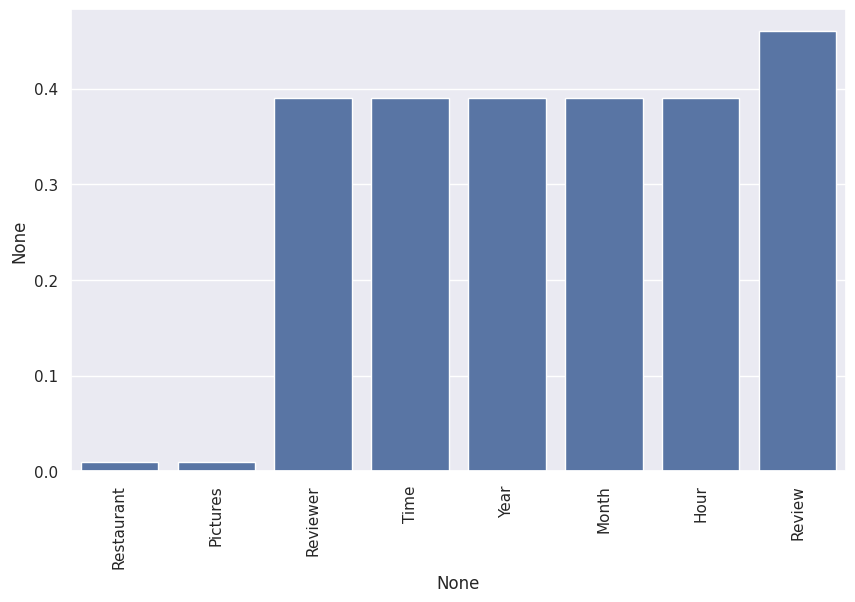

In [ ]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

observation : Followers columns has large number of mising values

(0.0, 1.0)

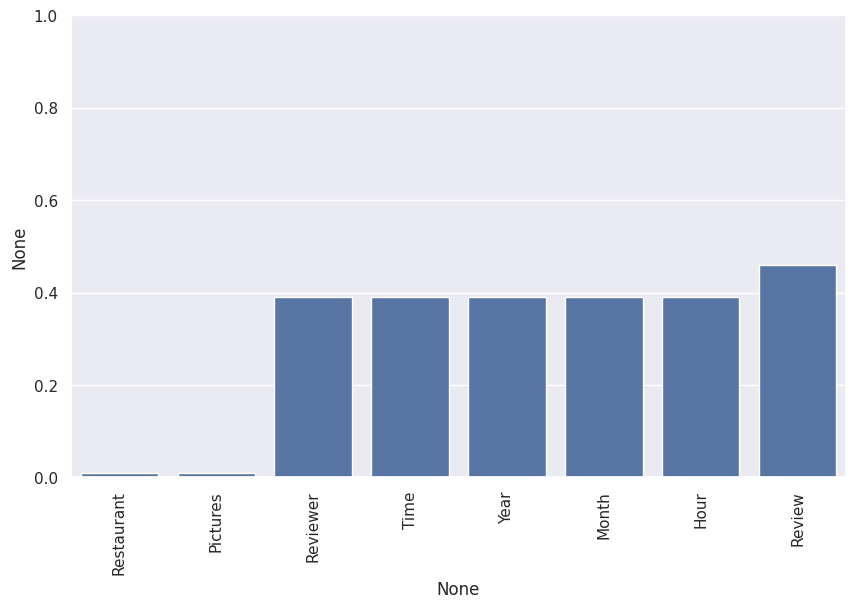

In [ ]:
# checking for missing value colums which are less than 1 percent
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);
# Set 1% Threshold
plt.ylim(0,1)

In [ ]:
#geting percentage of miss value less than one
percent_nan[percent_nan < 1]

Restaurant    0.01
Pictures      0.01
Reviewer      0.39
Time          0.39
Year          0.39
Month         0.39
Hour          0.39
Review        0.46
dtype: float64

observation : since most of the column missing percentage is 0.39% so, it quite possible that same row of each column is having null value, if so we can remove those row, lets check it...

In [ ]:
# Checking null values observation in Restaurant feature
reviews_df[reviews_df['Restaurant'].isnull()]

Restaurant Reviewer Review  Rating Time  Pictures  Year  Month  Hour
7601        NaN      NaN    NaN     3.5  NaT       NaN   NaN    NaN   NaN

In [ ]:
# Checking null values observation in Pictures feature
reviews_df[reviews_df['Pictures'].isnull()]

Restaurant Reviewer Review  Rating Time  Pictures  Year  Month  Hour
7601        NaN      NaN    NaN     3.5  NaT       NaN   NaN    NaN   NaN

In [ ]:
# Checking null values observation in Reviewer feature
reviews_df[reviews_df['Reviewer'].isnull()]

Restaurant Reviewer Review  Rating Time  Pictures  Year  Month  \
7601                  NaN      NaN    NaN     3.5  NaT       NaN   NaN    NaN   
8777  American Wild Wings      NaN    NaN     3.5  NaT       0.0   NaN    NaN   
8778  American Wild Wings      NaN    NaN     3.5  NaT       0.0   NaN    NaN   
8779  American Wild Wings      NaN    NaN     3.5  NaT       0.0   NaN    NaN   
8780  American Wild Wings      NaN    NaN     3.5  NaT       0.0   NaN    NaN   
8781  American Wild Wings      NaN    NaN     3.5  NaT       0.0   NaN    NaN   
8782  American Wild Wings      NaN    NaN     3.5  NaT       0.0   NaN    NaN   
8783  American Wild Wings      NaN    NaN     3.5  NaT       0.0   NaN    NaN   
8784  American Wild Wings      NaN    NaN     3.5  NaT       0.0   NaN    NaN   
8785  American Wild Wings      NaN    NaN     3.5  NaT       0.0   NaN    NaN   
8786  American Wild Wings      NaN    NaN     3.5  NaT       0.0   NaN    NaN   
8787  American Wild Wings      NaN    NaN     3.5  NaT       0.0   NaN    NaN   
8788  American Wild Wings      NaN    NaN     3.5  NaT       0.0   NaN    NaN   
8789  American Wild Wings      NaN    NaN     3.5  NaT       0.0   NaN    NaN   
8790  American Wild Wings      NaN    NaN     3.5  NaT       0.0   NaN    NaN   
8791  American Wild Wings      NaN    NaN     3.5  NaT       0.0   NaN    NaN   
8792  American Wild Wings      NaN    NaN     3.5  NaT       0.0   NaN    NaN   
8793  American Wild Wings      NaN    NaN     3.5  NaT       0.0   NaN    NaN   
8794  American Wild Wings      NaN    NaN     3.5  NaT       0.0   NaN    NaN   
8795  American Wild Wings      NaN    NaN     3.5  NaT       0.0   NaN    NaN   
8796  American Wild Wings      NaN    NaN     3.5  NaT       0.0   NaN    NaN   
8797  American Wild Wings      NaN    NaN     3.5  NaT       0.0   NaN    NaN   
8798  American Wild Wings      NaN    NaN     3.5  NaT       0.0   NaN    NaN   
8799  American Wild Wings      NaN    NaN     3.5  NaT       0.0   NaN    NaN   
9085         Arena Eleven      NaN    NaN     3.5  NaT       0.0   NaN    NaN   
9086         Arena Eleven      NaN    NaN     3.5  NaT       0.0   NaN    NaN   
9087         Arena Eleven      NaN    NaN     3.5  NaT       0.0   NaN    NaN   
9088         Arena Eleven      NaN    NaN     3.5  NaT       0.0   NaN    NaN   
9089         Arena Eleven      NaN    NaN     3.5  NaT       0.0   NaN    NaN   
9090         Arena Eleven      NaN    NaN     3.5  NaT       0.0   NaN    NaN   
9091         Arena Eleven      NaN    NaN     3.5  NaT       0.0   NaN    NaN   
9092         Arena Eleven      NaN    NaN     3.5  NaT       0.0   NaN    NaN   
9093         Arena Eleven      NaN    NaN     3.5  NaT       0.0   NaN    NaN   
9094         Arena Eleven      NaN    NaN     3.5  NaT       0.0   NaN    NaN   
9095         Arena Eleven      NaN    NaN     3.5  NaT       0.0   NaN    NaN   
9096         Arena Eleven      NaN    NaN     3.5  NaT       0.0   NaN    NaN   
9097         Arena Eleven      NaN    NaN     3.5  NaT       0.0   NaN    NaN   
9098         Arena Eleven      NaN    NaN     3.5  NaT       0.0   NaN    NaN   
9099         Arena Eleven      NaN    NaN     3.5  NaT       0.0   NaN    NaN   

      Hour  
7601   NaN  
8777   NaN  
8778   NaN  
8779   NaN  
8780   NaN  
8781   NaN  
8782   NaN  
8783   NaN  
8784   NaN  
8785   NaN  
8786   NaN  
8787   NaN  
8788   NaN  
8789   NaN  
8790   NaN  
8791   NaN  
8792   NaN  
8793   NaN  
8794   NaN  
8795   NaN  
8796   NaN  
8797   NaN  
8798   NaN  
8799   NaN  
9085   NaN  
9086   NaN  
9087   NaN  
9088   NaN  
9089   NaN  
9090   NaN  
9091   NaN  
9092   NaN  
9093   NaN  
9094   NaN  
9095   NaN  
9096   NaN  
9097   NaN  
9098   NaN  
9099   NaN

In [ ]:
# since all the data is cleaned and the missing data is common for all the features we can drop them all
reviews_df.dropna(inplace=True)

In [ ]:
# checking null values in the data set
reviews_df.isnull().sum()

Restaurant    0
Reviewer      0
Review        0
Rating        0
Time          0
Pictures      0
Year          0
Month         0
Hour          0
dtype: int64

---
# EDA
---

## Meta Data

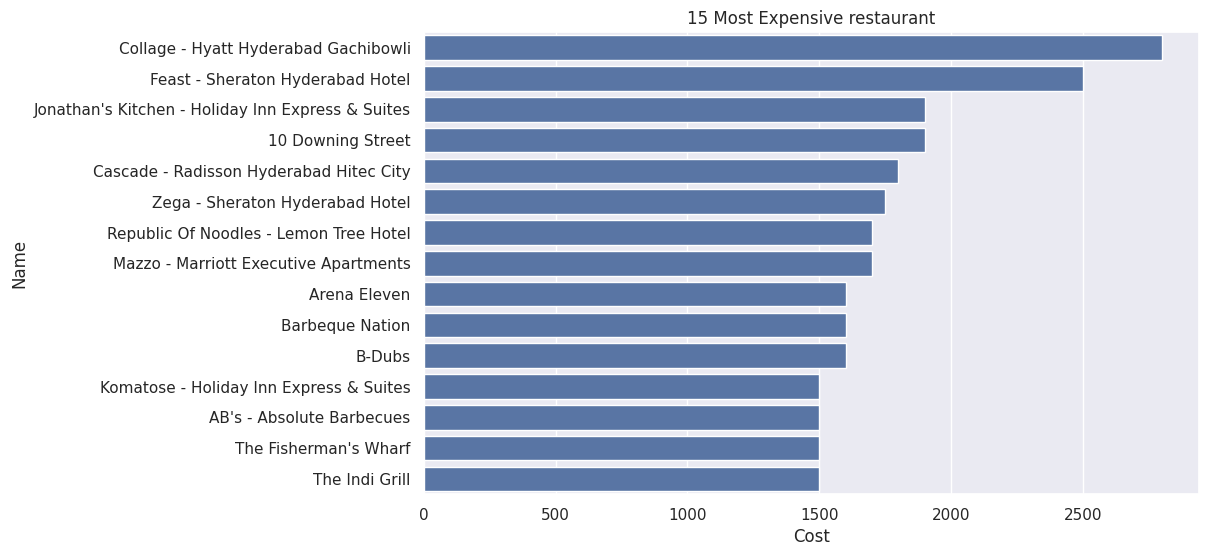

In [ ]:
# checking for most expensive Restaurant
sns.barplot(x='Cost',
            y="Name",
            data=meta_df,
            order=meta_df.sort_values('Cost',ascending=False).Name[:15])

plt.title('15 Most Expensive restaurant')
plt.show()

(-0.5, 1399.5, 1399.5, -0.5)

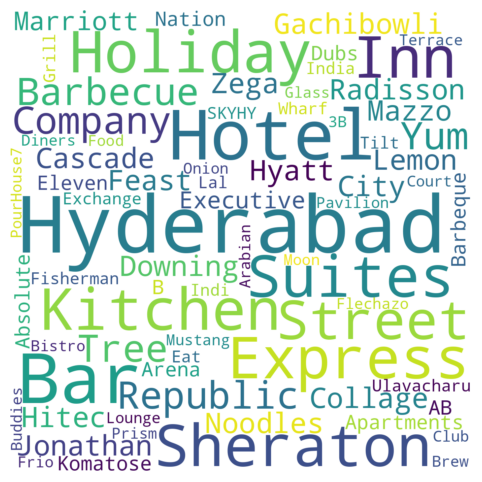

In [ ]:
#Creating the text variable

text = " ".join(name for name in meta_df.sort_values('Cost',ascending=False).Name[:30])


# Creating word_cloud with text as argument in .generate() method

word_cloud = WordCloud(width = 1400, height = 1400,collocations = False, background_color = 'white').generate(text)

# Display the generated Word Cloud

plt.imshow(word_cloud, interpolation='bilinear')

plt.axis("off")

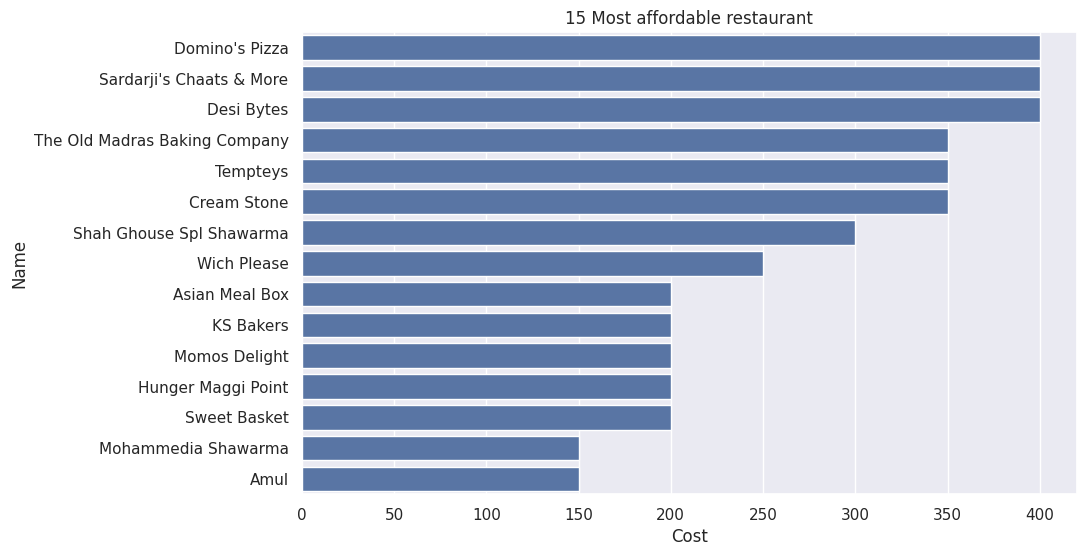

In [ ]:
# checking for most affordable Restaurant
sns.barplot(x='Cost',
            y="Name",
            data=meta_df,
            order=meta_df.sort_values('Cost',ascending=False).Name[-15:])

plt.title('15 Most affordable restaurant')
plt.show()

(-0.5, 1399.5, 1399.5, -0.5)

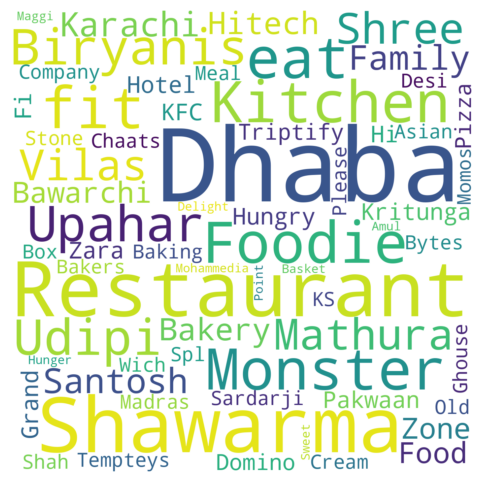

In [ ]:
#Creating the text variable

text = " ".join(name for name in meta_df.sort_values('Cost',ascending=False).Name[-30:])


# Creating word_cloud with text as argument in .generate() method

word_cloud = WordCloud(width = 1400, height = 1400,collocations = False, background_color = 'white').generate(text)

# Display the generated Word Cloud

plt.imshow(word_cloud, interpolation='bilinear')

plt.axis("off")

In [ ]:
# lets find the most cusines offered by Restaurants
meta_df.Cuisines

0      Chinese, Continental, Kebab, European, South I...
1                         Biryani, North Indian, Chinese
2           Asian, Mediterranean, North Indian, Desserts
3      Biryani, North Indian, Chinese, Seafood, Bever...
4      Asian, Continental, North Indian, Chinese, Med...
                             ...                        
100                                     Fast Food, Salad
101                                       Bakery, Mithai
102                       North Indian, Biryani, Chinese
103                                            Fast Food
104                      Thai, Asian, Chinese, Malaysian
Name: Cuisines, Length: 105, dtype: object

In [ ]:
# spliting the cusines and storing in list
cuisine_list=meta_df.Cuisines.str.split(', ')
cuisine_list

0      [Chinese, Continental, Kebab, European, South ...
1                       [Biryani, North Indian, Chinese]
2         [Asian, Mediterranean, North Indian, Desserts]
3      [Biryani, North Indian, Chinese, Seafood, Beve...
4      [Asian, Continental, North Indian, Chinese, Me...
                             ...                        
100                                   [Fast Food, Salad]
101                                     [Bakery, Mithai]
102                     [North Indian, Biryani, Chinese]
103                                          [Fast Food]
104                    [Thai, Asian, Chinese, Malaysian]
Name: Cuisines, Length: 105, dtype: object

In [ ]:
# storing all the cusines in a dict
cuis_dict = {}
for names in cuisine_list:
    for name in names:
        if (name in cuis_dict):
            cuis_dict[name]+=1
        else:
            cuis_dict[name]=1

In [ ]:
# converting the dict to a data frame
cuis_df=pd.DataFrame.from_dict([cuis_dict]).transpose().reset_index().rename(columns={'index':'Cuisine',0:'Number of Restaurants'})

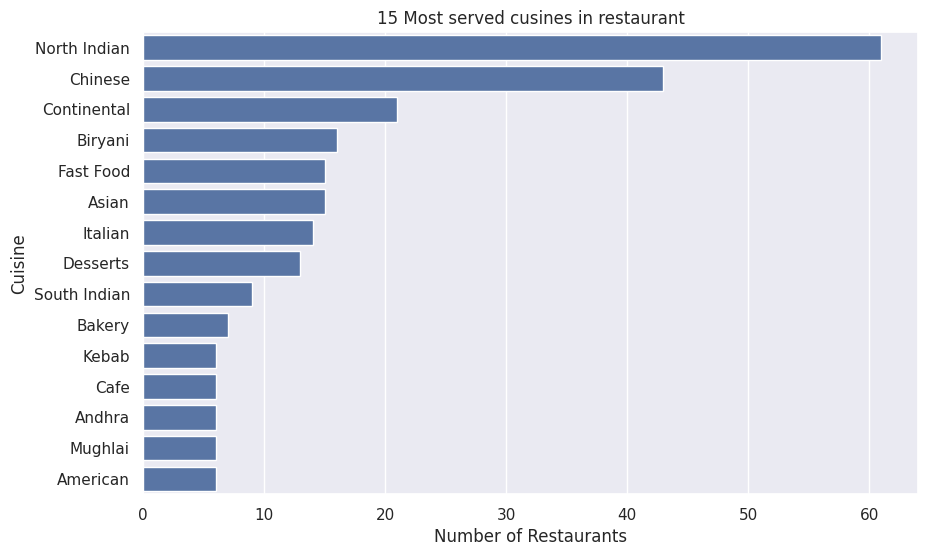

In [ ]:
# graph for most cusines served in restaurant
sns.barplot(y='Cuisine',
            x="Number of Restaurants",
            data=cuis_df,
            order=cuis_df.sort_values('Number of Restaurants',ascending=False).Cuisine[:15])
plt.title('15 Most served cusines in restaurant')
plt.show()


In [ ]:
cuisine_list


0      [Chinese, Continental, Kebab, European, South ...
1                       [Biryani, North Indian, Chinese]
2         [Asian, Mediterranean, North Indian, Desserts]
3      [Biryani, North Indian, Chinese, Seafood, Beve...
4      [Asian, Continental, North Indian, Chinese, Me...
                             ...                        
100                                   [Fast Food, Salad]
101                                     [Bakery, Mithai]
102                     [North Indian, Biryani, Chinese]
103                                          [Fast Food]
104                    [Thai, Asian, Chinese, Malaysian]
Name: Cuisines, Length: 105, dtype: object

(-0.5, 1399.5, 1399.5, -0.5)

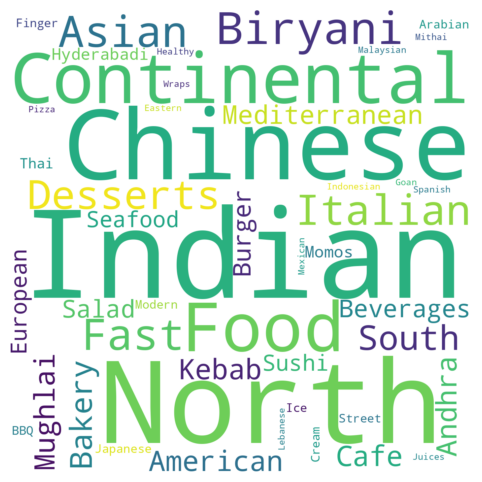

In [ ]:
#Creating the text variable

text = " ".join(name for name in meta_df.Cuisines )


# Creating word_cloud with text as argument in .generate() method

word_cloud = WordCloud(width = 1400, height = 1400,collocations = False, background_color = 'white').generate(text)

# Display the generated Word Cloud

plt.imshow(word_cloud, interpolation='bilinear')

plt.axis("off")

In [ ]:
# spliting the cusines and storing in list
Collections_list=meta_df.Collections.dropna().str.split(', ')
Collections_list

0      [Food Hygiene Rated Restaurants in Hyderabad, ...
1                                  [Hyderabad's Hottest]
2                   [Great Buffets, Hyderabad's Hottest]
3                               [Late Night Restaurants]
4      [Best Bars & Pubs, Food Hygiene Rated Restaura...
5      [Sunday Brunches, Corporate Favorites, Great B...
6          [Food Hygiene Rated Restaurants in Hyderabad]
8      [Great Buffets, Live Sports Screenings, Best B...
9                                      [Frozen Delights]
10       [Street Food, Veggie Friendly, Pocket Friendly]
11                                    [Barbecue & Grill]
12                                       [Great Buffets]
13     [Corporate Favorites, Happy Hours, Live Sports...
14     [Barbecue & Grill, Great Buffets, Corporate Fa...
18                                  [Trending This Week]
19                                  [Trending This Week]
20                                     [Veggie Friendly]
21                      [Great 

In [ ]:
# storing all the cusines in a dict
Collections_dict = {}
for names in Collections_list:
    for name in names:
        if (name in Collections_dict):
            Collections_dict[name]+=1
        else:
            Collections_dict[name]=1

In [ ]:
# converting the dict to a data frame
Collections_df=pd.DataFrame.from_dict([Collections_dict]).transpose().reset_index().rename(columns={'index':'Taggs',0:'Number of Restaurants'})

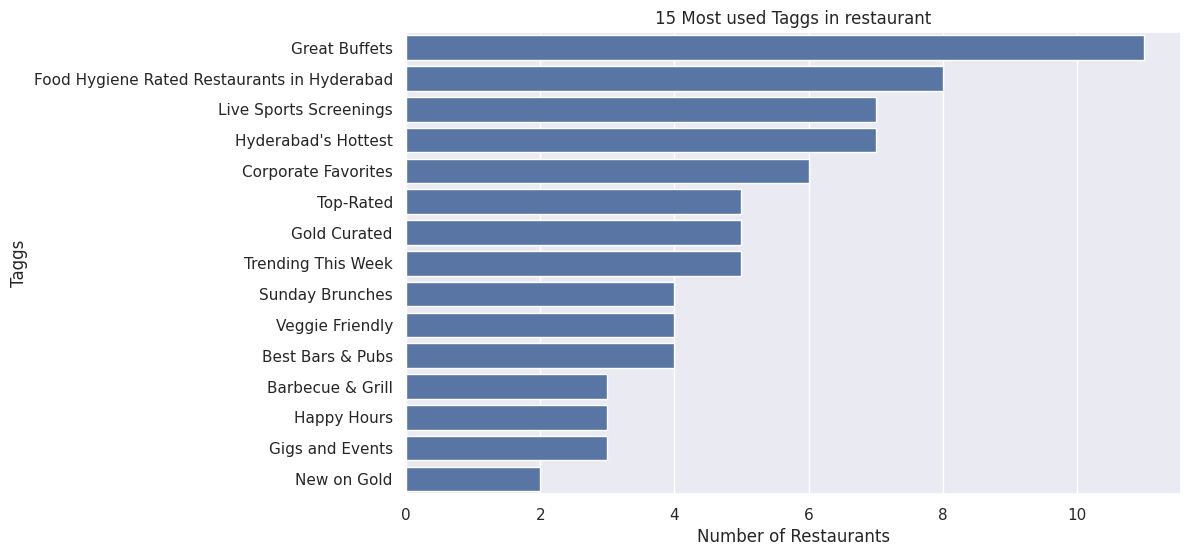

In [ ]:
# graph for most cusines served in restaurant
sns.barplot(y='Taggs',
            x="Number of Restaurants",
            data=Collections_df,
            order=Collections_df.sort_values('Number of Restaurants',ascending=False).Taggs[:15])
plt.title('15 Most used Taggs in restaurant')
plt.show()


(-0.5, 1399.5, 1399.5, -0.5)

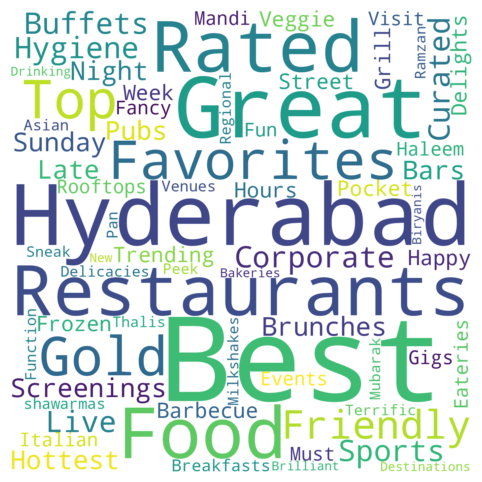

In [ ]:
#Creating the text variable

text = " ".join(name for name in Collections_df.Taggs )


# Creating word_cloud with text as argument in .generate() method

word_cloud = WordCloud(width = 1400, height = 1400,collocations = False, background_color = 'white').generate(text)

# Display the generated Word Cloud

plt.imshow(word_cloud, interpolation='bilinear')

plt.axis("off")

## Reviews

In [ ]:
reviews_df.head()

Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review  Rating  \
0  The ambience was good, food was quite good . h...     5.0   
1  Ambience is too good for a pleasant evening. S...     5.0   
2  A must try.. great food great ambience. Thnx f...     5.0   
3  Soumen das and Arun was a great guy. Only beca...     5.0   
4  Food is good.we ordered Kodi drumsticks and ba...     5.0   

                 Time  Pictures    Year  Month  Hour  
0 2019-05-25 15:54:00       0.0  2019.0    5.0  15.0  
1 2019-05-25 14:20:00       0.0  2019.0    5.0  14.0  
2 2019-05-24 22:54:00       0.0  2019.0    5.0  22.0  
3 2019-05-24 22:11:00       0.0  2019.0    5.0  22.0  
4 2019-05-24 21:37:00       0.0  2019.0    5.0  21.0

<Axes: ylabel='count'>

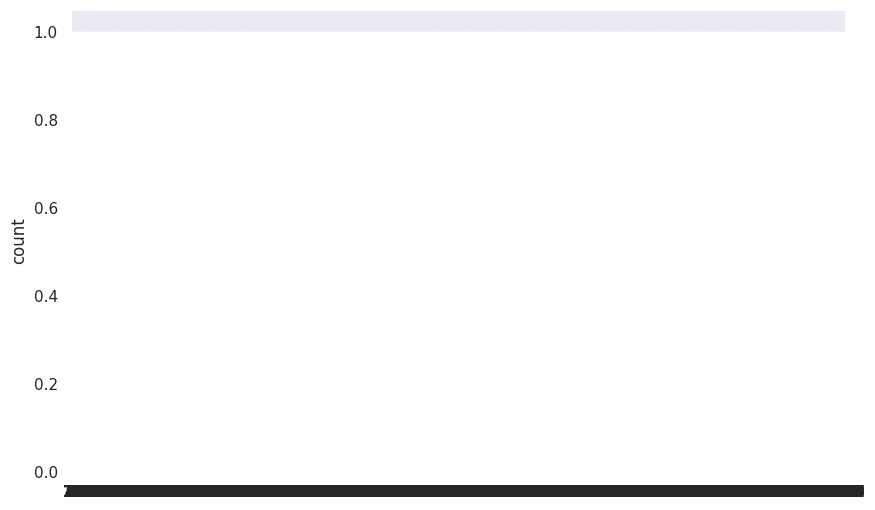

In [ ]:
sns.countplot(reviews_df.Rating)

**lets find the restaurant with best reviews**

In [ ]:
reviews_df

Restaurant              Reviewer  \
0      Beyond Flavours     Rusha Chakraborty   
1      Beyond Flavours  Anusha Tirumalaneedi   
2      Beyond Flavours       Ashok Shekhawat   
3      Beyond Flavours        Swapnil Sarkar   
4      Beyond Flavours                Dileep   
...                ...                   ...   
9995  Chinese Pavilion      Abhishek Mahajan   
9996  Chinese Pavilion        Sharad Agrawal   
9997  Chinese Pavilion             Ramandeep   
9998  Chinese Pavilion       Nayana Shanbhag   
9999  Chinese Pavilion      Bhargava Krishna   

                                                 Review  Rating  \
0     The ambience was good, food was quite good . h...     5.0   
1     Ambience is too good for a pleasant evening. S...     5.0   
2     A must try.. great food great ambience. Thnx f...     5.0   
3     Soumen das and Arun was a great guy. Only beca...     5.0   
4     Food is good.we ordered Kodi drumsticks and ba...     5.0   
...                                                 ...     ...   
9995  Madhumathi Mahajan Well to start with nice cou...     3.0   
9996  This place has never disappointed us.. The foo...     4.5   
9997  Bad rating is mainly because of "Chicken Bone ...     1.5   
9998  I personally love and prefer Chinese Food. Had...     4.0   
9999  Checked in here to try some delicious chinese ...     3.5   

                    Time  Pictures    Year  Month  Hour  
0    2019-05-25 15:54:00       0.0  2019.0    5.0  15.0  
1    2019-05-25 14:20:00       0.0  2019.0    5.0  14.0  
2    2019-05-24 22:54:00       0.0  2019.0    5.0  22.0  
3    2019-05-24 22:11:00       0.0  2019.0    5.0  22.0  
4    2019-05-24 21:37:00       0.0  2019.0    5.0  21.0  
...                  ...       ...     ...    ...   ...  
9995 2016-06-05 00:08:00       0.0  2016.0    6.0   0.0  
9996 2016-06-04 22:01:00       0.0  2016.0    6.0  22.0  
9997 2016-06-03 10:37:00       3.0  2016.0    6.0  10.0  
9998 2016-05-31 17:22:00       0.0  2016.0    5.0  17.0  
9999 2016-05-31 16:41:00       6.0  2016.0    5.0  16.0  

[9954 rows x 9 columns]

In [ ]:
df_rating = reviews_df.groupby(['Restaurant']).agg({'Rating':'mean','Restaurant':'count'}).rename(columns={'Restaurant':'number_of_rating'}).reset_index()
df_rating.describe()

Rating  number_of_rating
count  100.000000         100.00000
mean     3.601891          99.54000
std      0.508100           2.73924
min      2.400000          77.00000
25%      3.245000         100.00000
50%      3.613081         100.00000
75%      3.846250         100.00000
max      4.880000         100.00000

* looks like we got 100 rating for all the restaurants

Text(0.5, 1.0, 'Top 10 Restaurants by Rating')

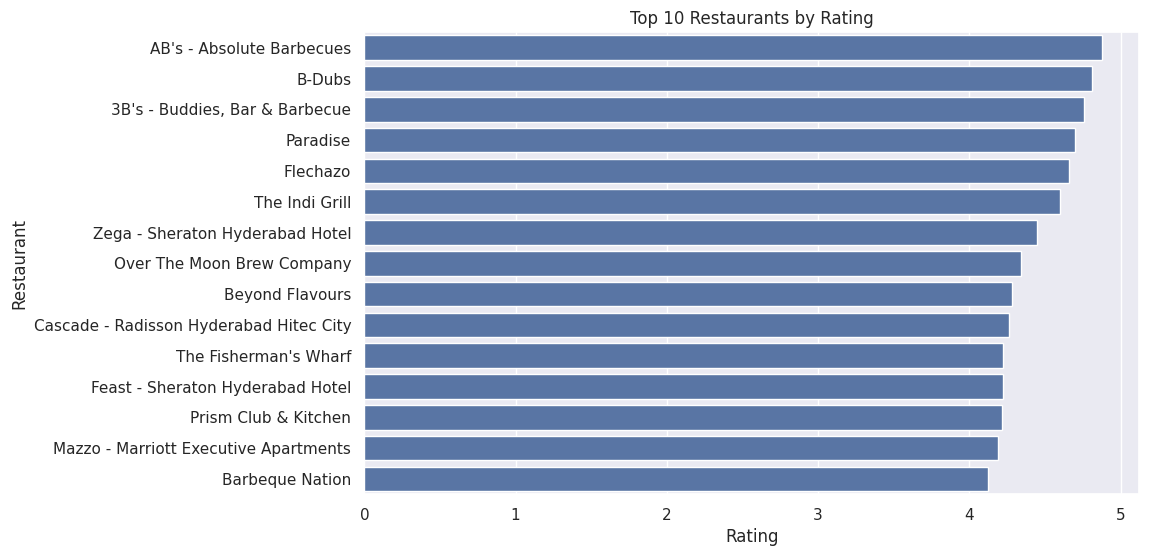

In [ ]:
sns.barplot(data=df_rating, x='Rating', y='Restaurant', order=df_rating.sort_values('Rating',ascending=False).Restaurant[:15])
plt.title('Top 10 Restaurants by Rating')

In [ ]:
df_Reviewer = reviews_df.groupby(['Reviewer']).agg({'Reviews':'sum','Rating':'mean'}).reset_index()
most_famous_reviewer = df_Reviewer[(df_Reviewer['Reviews'] > 100) & (df_Reviewer['Rating'] > 3.5)]


KeyError: "Column(s) ['Reviews'] do not exist"

In [ ]:
# Group by 'Reviewer' and count reviews
df_Reviewer = reviews_df.groupby(['Reviewer']).agg({'Review': 'count', 'Rating': 'mean'}).reset_index()
most_famous_reviewer=df_Reviewer[(df_Reviewer['Review']>100)&(df_Reviewer['Rating']>3.5)]
most_famous_reviewer


Empty DataFrame
Columns: [Reviewer, Review, Rating]
Index: []

In [ ]:
df_Reviewer.describe([0.90])

Review       Rating
count  7442.000000  7442.000000
mean      1.337544     3.578302
std       0.965894     1.502574
min       1.000000     1.000000
50%       1.000000     4.000000
90%       2.000000     5.000000
max      13.000000     5.000000

Text(0.5, 1.0, 'Top 15 Reviewers by no of reviews')

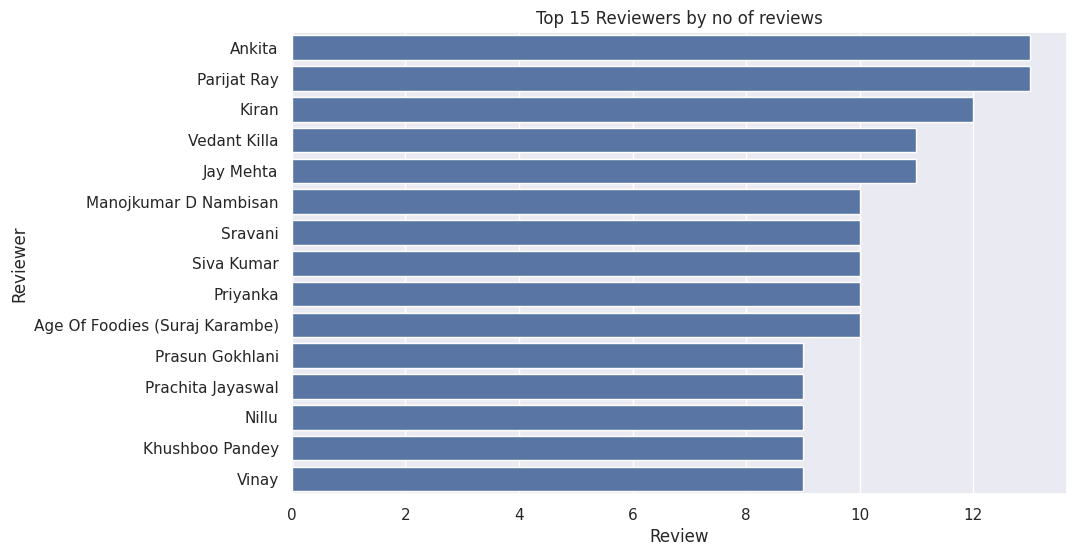

In [ ]:
sns.barplot(data=df_Reviewer, x='Review', y='Reviewer', order=df_Reviewer.sort_values('Review',ascending=False).Reviewer[:15])
plt.title('Top 15 Reviewers by no of reviews')

<Axes: xlabel='Time', ylabel='Count'>

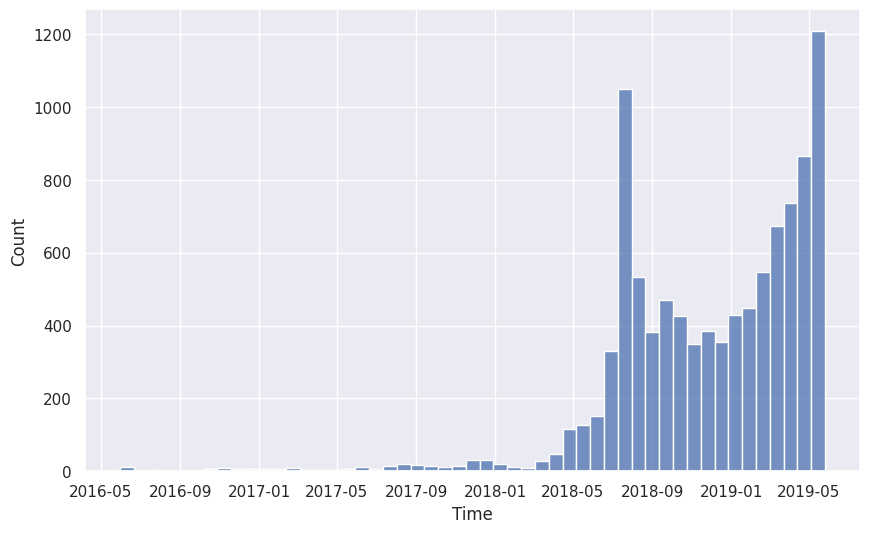

In [ ]:
sns.histplot(reviews_df.Time)

* looks like most of people started reviewing restaurant after may 2018

<Axes: ylabel='count'>

Error in callback <function _draw_all_if_interactive at 0x7bdc60929000> (for post_execute):


KeyboardInterrupt: 

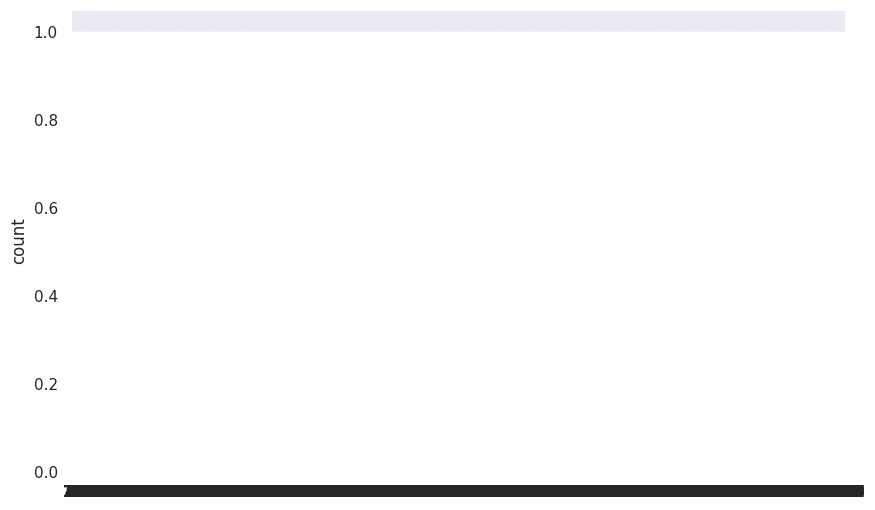

In [ ]:
sns.countplot(reviews_df.Month)

*most of the reviews are in the month of 5 and 7 month of year

---
# Text processing
---

In [ ]:
# storing reviews in a variable for data processing
reviews=reviews_df.Review
reviews

0       The ambience was good, food was quite good . h...
1       Ambience is too good for a pleasant evening. S...
2       A must try.. great food great ambience. Thnx f...
3       Soumen das and Arun was a great guy. Only beca...
4       Food is good.we ordered Kodi drumsticks and ba...
                              ...                        
9995    Madhumathi Mahajan Well to start with nice cou...
9996    This place has never disappointed us.. The foo...
9997    Bad rating is mainly because of "Chicken Bone ...
9998    I personally love and prefer Chinese Food. Had...
9999    Checked in here to try some delicious chinese ...
Name: Review, Length: 9954, dtype: object

In [ ]:
!pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 15.0 MB/s eta 0:00:00


In [ ]:
# functions for text preprocessing
def lower_case(text):
  '''convert the string in lower case
  '''
  text=[x.lower() for x in text]
  return text

import string
def remove_punctuation (text):
  '''remove punctuation from the the list of strings
  '''
  text = [''.join(c for c in s if c not in string.punctuation) for s in text]
  return text

import re
regex = re.compile('[^a-zA-Z]')
def remove_non_leters(text):
  '''used to remove all non leters form the list
  '''
  text=[regex.sub(' ', x) for x in text]
  return text

def remove_all_extra_spaces (text):
  '''removes all extra space from the text
  '''
  for index,x in enumerate(text):
    text[index]=" ".join(x.split())
  return text

import string
ascii_chars = set(string.printable)  # speeds things up
def remove_non_ascii_prinatble_from_list(list_of_words):
  '''removes non ascii charaters from text
  '''
  return [word for word in list_of_words
            if all(char in ascii_chars for char in word)]

import contractions
def remove_contrations(text):
  '''shotents the words form
  '''
  for index,x in enumerate(text):
    text[index] = contractions.fix(x)
  return text

def lemmatization_(text):
  '''converting to root words
  '''
  for index,x in enumerate(text):
    doc = nlp(x)
    l=list()
    for word in doc:
        l.append(word.lemma_)
    text[index]=' '.join(l)

  return text


def Change_text(msg):
  '''Removing StopWord
  '''
  main_text=[word for word in no_punc.split() if word.lower() not in stop_list]
  return ' '.join(main_text)

def remove_stop_words (text):
  test_2=[]
  for x in reviews:
    test_1=[]
    for i in x.split(' '):
      if i not in stop_word_list:
        test_1.append(i)
    test_2.append(' '.join(test_1))
  return test_2

In [ ]:
#download small spacy model
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 26.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')
# Print the set of spaCy's default stop words and adding common words of data set
print(nlp.Defaults.stop_words)
print(nlp.vocab['-PRON-'].is_stop)

{'should', 'being', 'such', 'without', 'cannot', 'anything', 'off', 'same', 'are', 'may', 'be', '’m', 'will', 'i', 'then', 'everyone', 'several', 'other', 'amongst', 'fifteen', 'less', 'over', 'all', 'noone', 'why', 'where', 'really', 'show', 'most', 'more', 'whoever', 'no', 'yet', 'beside', 'for', 'out', 'would', 'none', 'yourselves', 'we', 'became', 'of', 'nobody', 'on', 'part', 'whither', 'into', 'up', 'itself', 'used', 'some', 'than', 'mine', 'ten', 'could', 'quite', 'in', 'indeed', 'nowhere', 'how', 'say', "'ve", 'whole', 'becoming', 'do', 'make', 'both', 'nevertheless', 'elsewhere', 'thru', 'afterwards', 'whether', '’ve', 'name', 'twelve', 'there', '‘ll', 'yours', 'upon', 'another', 'already', 'five', 'am', 'get', 'become', 'forty', 'go', 'because', 'besides', 'twenty', 'their', 'here', 'hence', 'herself', 'made', 'can', 'moreover', 'seeming', 'whatever', 'that', "'d", 'enough', 'thereafter', 'serious', 'formerly', 'she', 'once', 'around', 'give', 'among', 'take', 'whenever', 'th

In [ ]:
# Add the word to the set of stop words. Use lowercase!
nlp.Defaults.stop_words.add('-PRON-')

# Set the stop_word tag on the lexeme
nlp.vocab['-PRON-'].is_stop = True

In [ ]:
# Add the word to the set of stop words. Use lowercase!
nlp.Defaults.stop_words.add('pron')

# Set the stop_word tag on the lexeme
nlp.vocab['-PRON-'].is_stop = True

In [ ]:
# storing nlp stop wors in a list
stop_word_list=list(nlp.Defaults.stop_words)
stop_word_list

['pron',
 'should',
 'being',
 'such',
 'without',
 'cannot',
 'anything',
 'off',
 'same',
 'are',
 'may',
 'be',
 '’m',
 'will',
 'i',
 'then',
 'everyone',
 'several',
 'other',
 'amongst',
 'fifteen',
 'less',
 'over',
 'all',
 'noone',
 'why',
 'where',
 'really',
 'show',
 'most',
 'more',
 'whoever',
 'no',
 'yet',
 'beside',
 'for',
 'out',
 'would',
 'none',
 'yourselves',
 'we',
 'became',
 'of',
 'nobody',
 'on',
 'part',
 'whither',
 'into',
 'up',
 'itself',
 'used',
 'some',
 'than',
 'mine',
 'ten',
 'could',
 'quite',
 'in',
 'indeed',
 'nowhere',
 'how',
 'say',
 "'ve",
 'whole',
 'becoming',
 'do',
 'make',
 'both',
 'nevertheless',
 'elsewhere',
 'thru',
 'afterwards',
 'whether',
 '’ve',
 'name',
 'twelve',
 'there',
 '‘ll',
 'yours',
 'upon',
 'another',
 'already',
 'five',
 'am',
 'get',
 'become',
 'forty',
 'go',
 'because',
 'besides',
 'twenty',
 'their',
 'here',
 'hence',
 'herself',
 'made',
 'can',
 'moreover',
 'seeming',
 'whatever',
 'that',
 "'d",
 'e

In [ ]:
'''
convert the string in lower case, remove punctuation, non leters(numbers, emoji etc),
extra spaces, and non ascii characters, lemmatization and removing stop words
'''
reviews=lower_case(reviews)
reviews=remove_punctuation(reviews)
reviews=remove_non_leters(reviews)
reviews=remove_all_extra_spaces(reviews)
reviews=remove_non_ascii_prinatble_from_list(reviews)
reviews=remove_contrations(reviews)
reviews=lemmatization_(reviews)
reviews=remove_stop_words(reviews)

In [ ]:
all_words=' '.join(reviews)
all_words

'ambience good food good saturday lunch cost effective good place sate brunch chill friend parent waiter soumen das courteous helpful ambience good pleasant evening service prompt food good good experience souman das kudo service try great food great ambience thnx service pradeep subroto personal recommendation penne alfredo pasta music background amazing soumen das arun great guy behavior sincerety good food course I like visit place food goodwe order kodi drumstick basket mutton biryani good thank pradeep serve enjoy ambience good ambiance good service good food apradeecp subro good service food good papiya good hostess caption good star restaurant nice place ambience different food order tasty service gud worth visit reasonable visit place read review finally visit placeambience good come food crispy corn nice tawa fish ok basket biryani disappoint biryani ok flatter claim staff polite prompt especially pradeep suman excellent food specially like spicy food courteous staff shubro pr

In [ ]:
reviews

['ambience good food good saturday lunch cost effective good place sate brunch chill friend parent waiter soumen das courteous helpful',
 'ambience good pleasant evening service prompt food good good experience souman das kudo service',
 'try great food great ambience thnx service pradeep subroto personal recommendation penne alfredo pasta music background amazing',
 'soumen das arun great guy behavior sincerety good food course I like visit place',
 'food goodwe order kodi drumstick basket mutton biryani good thank pradeep serve enjoy ambience good',
 'ambiance good service good food apradeecp subro good service food good papiya good hostess caption good star restaurant',
 'nice place ambience different food order tasty service gud worth visit reasonable visit place',
 'read review finally visit placeambience good come food crispy corn nice tawa fish ok basket biryani disappoint biryani ok flatter claim staff polite prompt especially pradeep suman',
 'excellent food specially like spi

In [ ]:
# storing the reviews in a feature of df
reviews_df['Reviews']=reviews
reviews_df.head()

Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review  Rating  \
0  The ambience was good, food was quite good . h...     5.0   
1  Ambience is too good for a pleasant evening. S...     5.0   
2  A must try.. great food great ambience. Thnx f...     5.0   
3  Soumen das and Arun was a great guy. Only beca...     5.0   
4  Food is good.we ordered Kodi drumsticks and ba...     5.0   

                 Time  Pictures    Year  Month  Hour  \
0 2019-05-25 15:54:00       0.0  2019.0    5.0  15.0   
1 2019-05-25 14:20:00       0.0  2019.0    5.0  14.0   
2 2019-05-24 22:54:00       0.0  2019.0    5.0  22.0   
3 2019-05-24 22:11:00       0.0  2019.0    5.0  22.0   
4 2019-05-24 21:37:00       0.0  2019.0    5.0  21.0   

                                             Reviews  
0  ambience good food good saturday lunch cost ef...  
1  ambience good pleasant evening service prompt ...  
2  try great food great ambience thnx service pra...  
3  soumen das arun great guy behavior sincerety g...  
4  food goodwe order kodi drumstick basket mutton...

In [ ]:
#function to removing words greater than 45 and less than 2
def len_less_than2(review):
  review=" ".join([i for i in review.split() if len(i)>2])
  review=" ".join([i for i in review.split() if len(i)<=45])
  return review

In [ ]:
#removing words greater than 45 and less than 2
reviews_df['Reviews']=reviews_df['Reviews'].apply(lambda x:len_less_than2(x))

In [ ]:
reviews_df

Restaurant              Reviewer  \
0      Beyond Flavours     Rusha Chakraborty   
1      Beyond Flavours  Anusha Tirumalaneedi   
2      Beyond Flavours       Ashok Shekhawat   
3      Beyond Flavours        Swapnil Sarkar   
4      Beyond Flavours                Dileep   
...                ...                   ...   
9995  Chinese Pavilion      Abhishek Mahajan   
9996  Chinese Pavilion        Sharad Agrawal   
9997  Chinese Pavilion             Ramandeep   
9998  Chinese Pavilion       Nayana Shanbhag   
9999  Chinese Pavilion      Bhargava Krishna   

                                                 Review  Rating  \
0     The ambience was good, food was quite good . h...     5.0   
1     Ambience is too good for a pleasant evening. S...     5.0   
2     A must try.. great food great ambience. Thnx f...     5.0   
3     Soumen das and Arun was a great guy. Only beca...     5.0   
4     Food is good.we ordered Kodi drumsticks and ba...     5.0   
...                                                 ...     ...   
9995  Madhumathi Mahajan Well to start with nice cou...     3.0   
9996  This place has never disappointed us.. The foo...     4.5   
9997  Bad rating is mainly because of "Chicken Bone ...     1.5   
9998  I personally love and prefer Chinese Food. Had...     4.0   
9999  Checked in here to try some delicious chinese ...     3.5   

                    Time  Pictures    Year  Month  Hour  \
0    2019-05-25 15:54:00       0.0  2019.0    5.0  15.0   
1    2019-05-25 14:20:00       0.0  2019.0    5.0  14.0   
2    2019-05-24 22:54:00       0.0  2019.0    5.0  22.0   
3    2019-05-24 22:11:00       0.0  2019.0    5.0  22.0   
4    2019-05-24 21:37:00       0.0  2019.0    5.0  21.0   
...                  ...       ...     ...    ...   ...   
9995 2016-06-05 00:08:00       0.0  2016.0    6.0   0.0   
9996 2016-06-04 22:01:00       0.0  2016.0    6.0  22.0   
9997 2016-06-03 10:37:00       3.0  2016.0    6.0  10.0   
9998 2016-05-31 17:22:00       0.0  2016.0    5.0  17.0   
9999 2016-05-31 16:41:00       6.0  2016.0    5.0  16.0   

                                                Reviews  
0     ambience good food good saturday lunch cost ef...  
1     ambience good pleasant evening service prompt ...  
2     try great food great ambience thnx service pra...  
3     soumen das arun great guy behavior sincerety g...  
4     food goodwe order kodi drumstick basket mutton...  
...                                                 ...  
9995  madhumathi mahajan start nice courteous server...  
9996  place disappoint food courteous staff serene a...  
9997  bad rating mainly chicken bone find veg food a...  
9998  personally love prefer chinese food couple tim...  
9999  check try delicious chinese food nonveg lunche...  

[9954 rows x 10 columns]

In [ ]:
# droping the unview column
reviews_df=reviews_df.drop('Review',axis=1)

In [ ]:
reviews_df

Restaurant              Reviewer  Rating                Time  \
0      Beyond Flavours     Rusha Chakraborty     5.0 2019-05-25 15:54:00   
1      Beyond Flavours  Anusha Tirumalaneedi     5.0 2019-05-25 14:20:00   
2      Beyond Flavours       Ashok Shekhawat     5.0 2019-05-24 22:54:00   
3      Beyond Flavours        Swapnil Sarkar     5.0 2019-05-24 22:11:00   
4      Beyond Flavours                Dileep     5.0 2019-05-24 21:37:00   
...                ...                   ...     ...                 ...   
9995  Chinese Pavilion      Abhishek Mahajan     3.0 2016-06-05 00:08:00   
9996  Chinese Pavilion        Sharad Agrawal     4.5 2016-06-04 22:01:00   
9997  Chinese Pavilion             Ramandeep     1.5 2016-06-03 10:37:00   
9998  Chinese Pavilion       Nayana Shanbhag     4.0 2016-05-31 17:22:00   
9999  Chinese Pavilion      Bhargava Krishna     3.5 2016-05-31 16:41:00   

      Pictures    Year  Month  Hour  \
0          0.0  2019.0    5.0  15.0   
1          0.0  2019.0    5.0  14.0   
2          0.0  2019.0    5.0  22.0   
3          0.0  2019.0    5.0  22.0   
4          0.0  2019.0    5.0  21.0   
...        ...     ...    ...   ...   
9995       0.0  2016.0    6.0   0.0   
9996       0.0  2016.0    6.0  22.0   
9997       3.0  2016.0    6.0  10.0   
9998       0.0  2016.0    5.0  17.0   
9999       6.0  2016.0    5.0  16.0   

                                                Reviews  
0     ambience good food good saturday lunch cost ef...  
1     ambience good pleasant evening service prompt ...  
2     try great food great ambience thnx service pra...  
3     soumen das arun great guy behavior sincerety g...  
4     food goodwe order kodi drumstick basket mutton...  
...                                                 ...  
9995  madhumathi mahajan start nice courteous server...  
9996  place disappoint food courteous staff serene a...  
9997  bad rating mainly chicken bone find veg food a...  
9998  personally love prefer chinese food couple tim...  
9999  check try delicious chinese food nonveg lunche...  

[9954 rows x 9 columns]

---
# Performing  Clustering
---

In [ ]:
meta_df.head()

Name  \
0                 Beyond Flavours   
1                        Paradise   
2                        Flechazo   
3  Shah Ghouse Hotel & Restaurant   
4      Over The Moon Brew Company   

                                               Links  Cost  \
0  https://www.zomato.com/hyderabad/beyond-flavou...   800   
1  https://www.zomato.com/hyderabad/paradise-gach...   800   
2  https://www.zomato.com/hyderabad/flechazo-gach...  1300   
3  https://www.zomato.com/hyderabad/shah-ghouse-h...   800   
4  https://www.zomato.com/hyderabad/over-the-moon...  1200   

                                         Collections  \
0  Food Hygiene Rated Restaurants in Hyderabad, C...   
1                                Hyderabad's Hottest   
2                 Great Buffets, Hyderabad's Hottest   
3                             Late Night Restaurants   
4  Best Bars & Pubs, Food Hygiene Rated Restauran...   

                                            Cuisines  \
0  Chinese, Continental, Kebab, European, South I...   
1                     Biryani, North Indian, Chinese   
2       Asian, Mediterranean, North Indian, Desserts   
3  Biryani, North Indian, Chinese, Seafood, Bever...   
4  Asian, Continental, North Indian, Chinese, Med...   

                                             Timings  
0      12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)  
1                                     11 AM to 11 PM  
2              11:30 AM to 4:30 PM, 6:30 PM to 11 PM  
3                                    12 Noon to 2 AM  
4  12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...

In [ ]:
# converting the cuisines to lower case
meta_df['Cuisines'] = meta_df['Cuisines'].apply(lambda x : x.lower())

In [ ]:
cuisine_df=meta_df.loc[:,['Name','Cost','Cuisines']]

In [ ]:
cuisine_df.head()

Name  Cost  \
0                 Beyond Flavours   800   
1                        Paradise   800   
2                        Flechazo  1300   
3  Shah Ghouse Hotel & Restaurant   800   
4      Over The Moon Brew Company  1200   

                                            Cuisines  
0  chinese, continental, kebab, european, south i...  
1                     biryani, north indian, chinese  
2       asian, mediterranean, north indian, desserts  
3  biryani, north indian, chinese, seafood, bever...  
4  asian, continental, north indian, chinese, med...

In [ ]:
# spliting the cuisine and storing in list
def cuisine_list(cuisines):
   all_cuisines = list(set(cuisines.split(', ')))
   return all_cuisines

In [ ]:
cuisine_df['cuisine']=cuisine_df['Cuisines'].apply(lambda x : cuisine_list(x))

In [ ]:
cuisine_df.head()

Name  Cost  \
0                 Beyond Flavours   800   
1                        Paradise   800   
2                        Flechazo  1300   
3  Shah Ghouse Hotel & Restaurant   800   
4      Over The Moon Brew Company  1200   

                                            Cuisines  \
0  chinese, continental, kebab, european, south i...   
1                     biryani, north indian, chinese   
2       asian, mediterranean, north indian, desserts   
3  biryani, north indian, chinese, seafood, bever...   
4  asian, continental, north indian, chinese, med...   

                                             cuisine  
0  [continental, chinese, kebab, south indian, eu...  
1                   [chinese, north indian, biryani]  
2     [north indian, mediterranean, asian, desserts]  
3  [chinese, biryani, seafood, beverages, north i...  
4  [continental, chinese, asian, mediterranean, n...

In [ ]:
# Transform each element of a list-like to a row
cuisine_df=cuisine_df.explode('cuisine')
cuisine_df.head()

Name  Cost                                           Cuisines  \
0  Beyond Flavours   800  chinese, continental, kebab, european, south i...   
0  Beyond Flavours   800  chinese, continental, kebab, european, south i...   
0  Beyond Flavours   800  chinese, continental, kebab, european, south i...   
0  Beyond Flavours   800  chinese, continental, kebab, european, south i...   
0  Beyond Flavours   800  chinese, continental, kebab, european, south i...   

        cuisine  
0   continental  
0       chinese  
0         kebab  
0  south indian  
0      european

In [ ]:
# checking unique values of cuisine
set(cuisine_df["cuisine"])

{'american',
 'andhra',
 'arabian',
 'asian',
 'bakery',
 'bbq',
 'beverages',
 'biryani',
 'burger',
 'cafe',
 'chinese',
 'continental',
 'desserts',
 'european',
 'fast food',
 'finger food',
 'goan',
 'healthy food',
 'hyderabadi',
 'ice cream',
 'indonesian',
 'italian',
 'japanese',
 'juices',
 'kebab',
 'lebanese',
 'malaysian',
 'mediterranean',
 'mexican',
 'mithai',
 'modern indian',
 'momos',
 'mughlai',
 'north eastern',
 'north indian',
 'pizza',
 'salad',
 'seafood',
 'south indian',
 'spanish',
 'street food',
 'sushi',
 'thai',
 'wraps'}

In [ ]:
cuisine_df['cuisine']

0       continental
0           chinese
0             kebab
0      south indian
0          european
           ...     
103       fast food
104         chinese
104       malaysian
104           asian
104            thai
Name: cuisine, Length: 313, dtype: object

## Brinning all the cuisines into their respective supersets spicy food, Healthy food, Fast Food,Dessert

In [ ]:
# Brinning all the cuisines into their respective supersets spicy food, Healthy food, Fast Food,Dessert
l=[]
for i in cuisine_df['cuisine']:
  if (i=='hyderabadi')| (i=='asian')|(i=='kebab')|(i=='north indian')|(i=='modern indian')|(i=='continental')|(i=='bbq')|(i=='biryani')|(i=='indonesian')|(i=='mughlai')|(i=='malaysian'):
    l.append('spicy food')
  if (i=='andhra')|(i=='north eastern')|(i=='lebanese')|(i=='salad')|(i=='south indian')|(i=='italian')|(i=='european')|(i=='mediterranean')|(i=='american')|(i=='thai')|(i=='arabian')|(i=='seafood')|(i=='mexican')|(i=='healthy food')|(i=='goan')|(i=='spanish'):
    l.append('Healthy food')
  if (i=='momos')|(i=='street food')|(i=='cafe')|(i=='chinese')|(i=='japanese')|(i=='pizza')|(i=='wraps')|(i=='burger')|(i=='fast food')|(i=='finger food')|(i=='sushi'):
    l.append('fast food')
  if (i=='bakery')|(i=='beverages')|(i=='desserts')|(i=='juices')|(i=='ice cream')|(i=='mithai'):
    l.append('Dessert')

In [ ]:
# updating the data frame with cuisines superset
superset_cuisine=pd.DataFrame(l)
superset_cuisine.columns=['cuisine']
superset_cuisine

cuisine
0      spicy food
1       fast food
2      spicy food
3    Healthy food
4    Healthy food
..            ...
308     fast food
309     fast food
310    spicy food
311    spicy food
312  Healthy food

[313 rows x 1 columns]

In [ ]:
superset_cuisine.value_counts()

cuisine     
spicy food      135
fast food        85
Healthy food     64
Dessert          29
Name: count, dtype: int64

In [ ]:
# droping the cuisine feature and creating new data frame with cuisine superset
cuisine_df.reset_index(inplace=True)
cuisine_df.drop(['cuisine'],axis=1,inplace=True)
dataset=pd.concat([cuisine_df,superset_cuisine],axis=1)
dataset.drop(['index'],axis=1,inplace=True)

## Making dummies of superset cuisines

In [ ]:
# generate binary values using get_dummies
dum_df = pd.get_dummies(dataset, columns=["cuisine"],prefix=None)

In [ ]:
dum_df

Name  Cost  \
0                           Beyond Flavours   800   
1                           Beyond Flavours   800   
2                           Beyond Flavours   800   
3                           Beyond Flavours   800   
4                           Beyond Flavours   800   
..                                      ...   ...   
308                             Wich Please   250   
309  Republic Of Noodles - Lemon Tree Hotel  1700   
310  Republic Of Noodles - Lemon Tree Hotel  1700   
311  Republic Of Noodles - Lemon Tree Hotel  1700   
312  Republic Of Noodles - Lemon Tree Hotel  1700   

                                              Cuisines  cuisine_Dessert  \
0    chinese, continental, kebab, european, south i...            False   
1    chinese, continental, kebab, european, south i...            False   
2    chinese, continental, kebab, european, south i...            False   
3    chinese, continental, kebab, european, south i...            False   
4    chinese, continental, kebab, european, south i...            False   
..                                                 ...              ...   
308                                          fast food            False   
309                    thai, asian, chinese, malaysian            False   
310                    thai, asian, chinese, malaysian            False   
311                    thai, asian, chinese, malaysian            False   
312                    thai, asian, chinese, malaysian            False   

     cuisine_Healthy food  cuisine_fast food  cuisine_spicy food  
0                   False              False                True  
1                   False               True               False  
2                   False              False                True  
3                    True              False               False  
4                    True              False               False  
..                    ...                ...                 ...  
308                 False               True               False  
309                 False               True               False  
310                 False              False                True  
311                 False              False                True  
312                  True              False               False  

[313 rows x 7 columns]

In [ ]:
cuisine=list(set(dum_df.columns)-set(['Name','Cost','Cuisines']))

In [ ]:
cluster_df=dum_df.groupby(['Name','Cost','Cuisines'])[cuisine].sum().reset_index()

## Made dummies on the basis of cuisine_Dessert, cuisine_spicy food, cuisine_fast food, cuisine_Healthy food

In [ ]:
cluster_df.head()

Name  Cost  \
0               10 Downing Street  1900   
1                        13 Dhaba   450   
2  3B's - Buddies, Bar & Barbecue  1100   
3       AB's - Absolute Barbecues  1500   
4               Absolute Sizzlers   750   

                                Cuisines  cuisine_Dessert  \
0     north indian, chinese, continental                0   
1                           north indian                0   
2  north indian, mediterranean, european                0   
3  european, mediterranean, north indian                0   
4         continental, american, chinese                0   

   cuisine_Healthy food  cuisine_spicy food  cuisine_fast food  
0                     0                   2                  1  
1                     0                   1                  0  
2                     2                   1                  0  
3                     2                   1                  0  
4                     1                   1                  1

In [ ]:
cluster_data=cluster_df.drop(['Name','Cuisines'],axis=1)

In [ ]:
cluster_data.head()

Cost  cuisine_Dessert  cuisine_Healthy food  cuisine_spicy food  \
0  1900                0                     0                   2   
1   450                0                     0                   1   
2  1100                0                     2                   1   
3  1500                0                     2                   1   
4   750                0                     1                   1   

   cuisine_fast food  
0                  1  
1                  0  
2                  0  
3                  0  
4                  1

In [ ]:
cluster_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Cost                  105 non-null    int64
 1   cuisine_Dessert       105 non-null    int64
 2   cuisine_Healthy food  105 non-null    int64
 3   cuisine_spicy food    105 non-null    int64
 4   cuisine_fast food     105 non-null    int64
dtypes: int64(5)
memory usage: 4.2 KB


## Standardizing each of the features in the clusters

In [ ]:
# scaling the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
cluster_data_sc=sc.fit_transform(cluster_data)
cluster_data_sc

array([[ 2.04558104, -0.45323567, -0.79975012,  0.71969146,  0.26513915],
       [-0.81035397, -0.45323567, -0.79975012, -0.28787658, -1.12684139],
       [ 0.46989276, -0.45323567,  1.82442995, -0.28787658, -1.12684139],
       [ 1.2577369 , -0.45323567,  1.82442995, -0.28787658, -1.12684139],
       [-0.21947087, -0.45323567,  0.51233992, -0.28787658,  0.26513915],
       [-0.21947087, -0.45323567,  0.51233992,  1.72725951,  0.26513915],
       [-0.51491242, -0.45323567,  1.82442995, -1.29544463,  1.6571197 ],
       [-1.40123708,  2.82881571, -0.79975012, -1.29544463, -1.12684139],
       [-0.71187346, -0.45323567, -0.79975012,  0.71969146,  0.26513915],
       [ 1.45469793, -0.45323567, -0.79975012, -0.28787658, -1.12684139],
       [-0.21947087, -0.45323567, -0.79975012,  1.72725951,  0.26513915],
       [-1.30275656, -0.45323567, -0.79975012, -0.28787658, -1.12684139],
       [ 1.45469793, -0.45323567,  0.51233992, -1.29544463, -1.12684139],
       [-0.31795139, -0.45323567,  1.8

## KMEANS Clustering for making clusters

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import  silhouette_score

In [ ]:
# finding best cluster bu error rate
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(cluster_data_sc)
    sse.append(km.inertia_)

 ## Using Elbow Analysis determining optimal clusters

In [ ]:
# finding best clusters by error rate
cluster_range = range(1,15)
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit_transform(cluster_data_sc)
    cluster_errors.append( clusters.inertia_ )

cluster_errors

[525.0000000000001,
 396.86023106088993,
 296.3372858514406,
 255.6005997670411,
 236.8305323007299,
 208.99173277096256,
 188.01960863604626,
 181.6706289170361,
 177.627494423383,
 148.0545220581355,
 137.1027543357404,
 124.75780699295828,
 123.43102611009635,
 111.39099645557518]

In [ ]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:9]

num_clusters  cluster_errors
0             1      525.000000
1             2      396.860231
2             3      296.337286
3             4      255.600600
4             5      236.830532
5             6      208.991733
6             7      188.019609
7             8      181.670629
8             9      177.627494

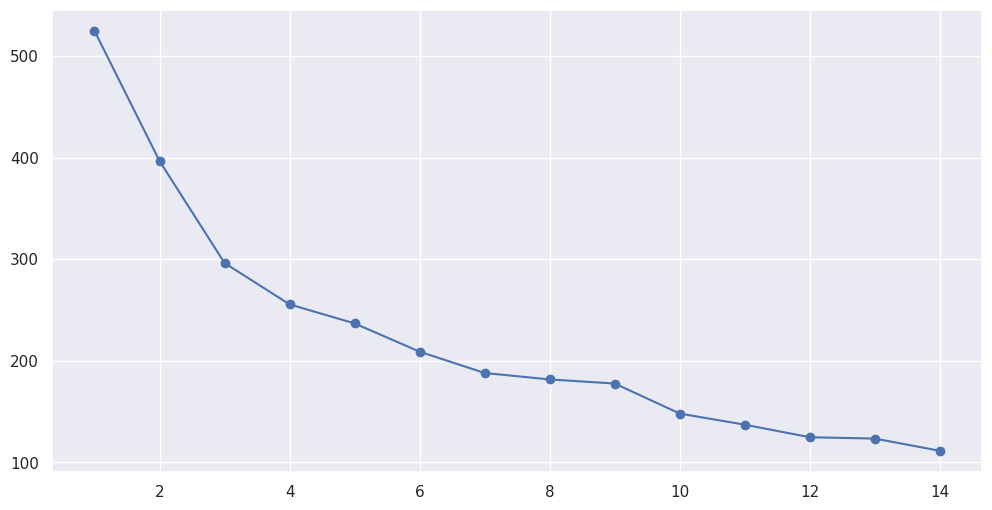

In [ ]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [ ]:
#finding best cluster by silhouette score
from sklearn import metrics

k_range = range(2, 9)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(cluster_data_sc)
    scores.append(metrics.silhouette_score(cluster_data_sc, km.labels_))

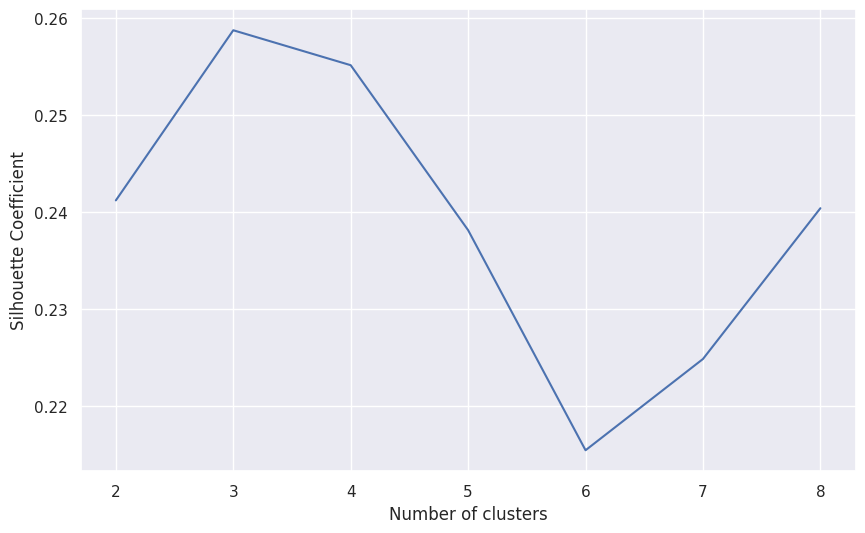

In [ ]:
# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

In [ ]:
X=cluster_data_sc

For n_clusters = 2 The average silhouette_score is : 0.2410619698219517
For n_clusters = 3 The average silhouette_score is : 0.2587638827511183
For n_clusters = 4 The average silhouette_score is : 0.19623639526550865
For n_clusters = 5 The average silhouette_score is : 0.22740922488618226
For n_clusters = 6 The average silhouette_score is : 0.23574957451231876
For n_clusters = 7 The average silhouette_score is : 0.2562005608196122
For n_clusters = 8 The average silhouette_score is : 0.25699830574336735
For n_clusters = 9 The average silhouette_score is : 0.25969842798369874
For n_clusters = 10 The average silhouette_score is : 0.26458870920276994
For n_clusters = 11 The average silhouette_score is : 0.26738938330477313
For n_clusters = 12 The average silhouette_score is : 0.28009792307161624
For n_clusters = 13 The average silhouette_score is : 0.28196778494676233
For n_clusters = 14 The average silhouette_score is : 0.27896258447226524
For n_clusters = 15 The average silhouette_score 

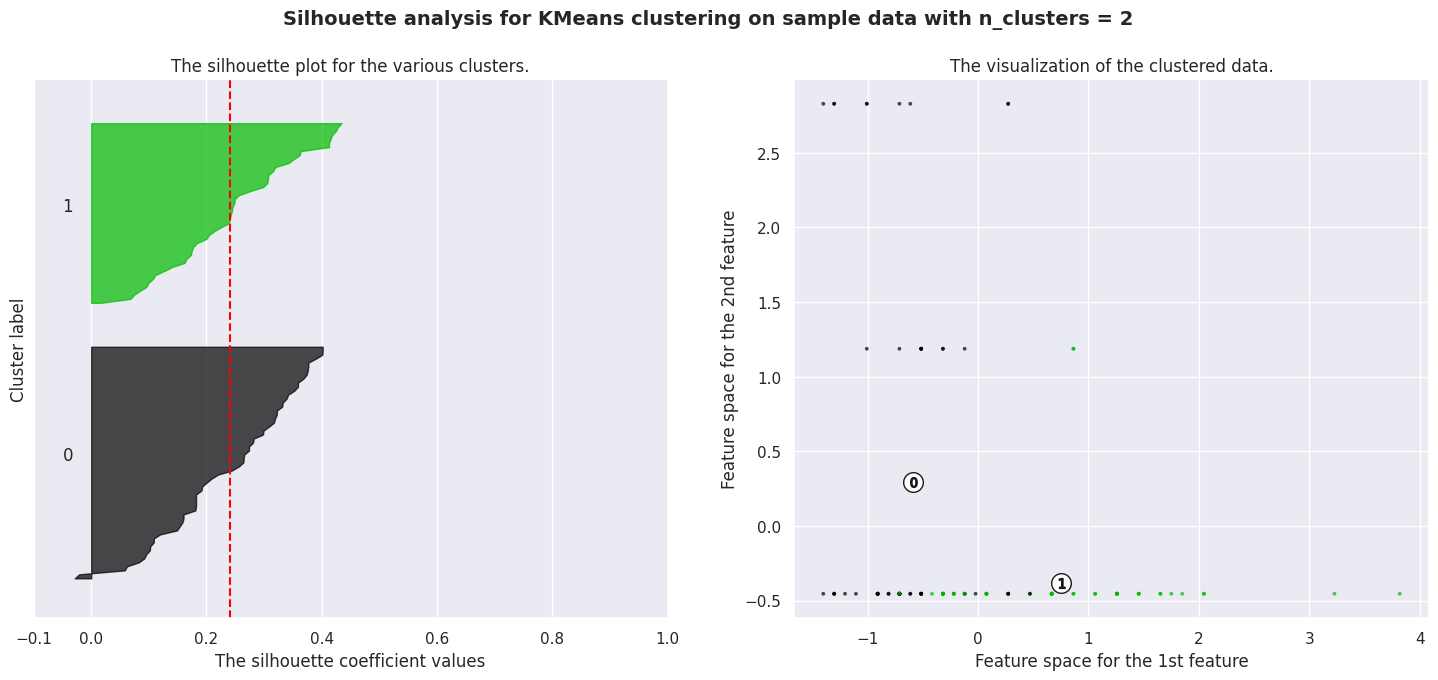

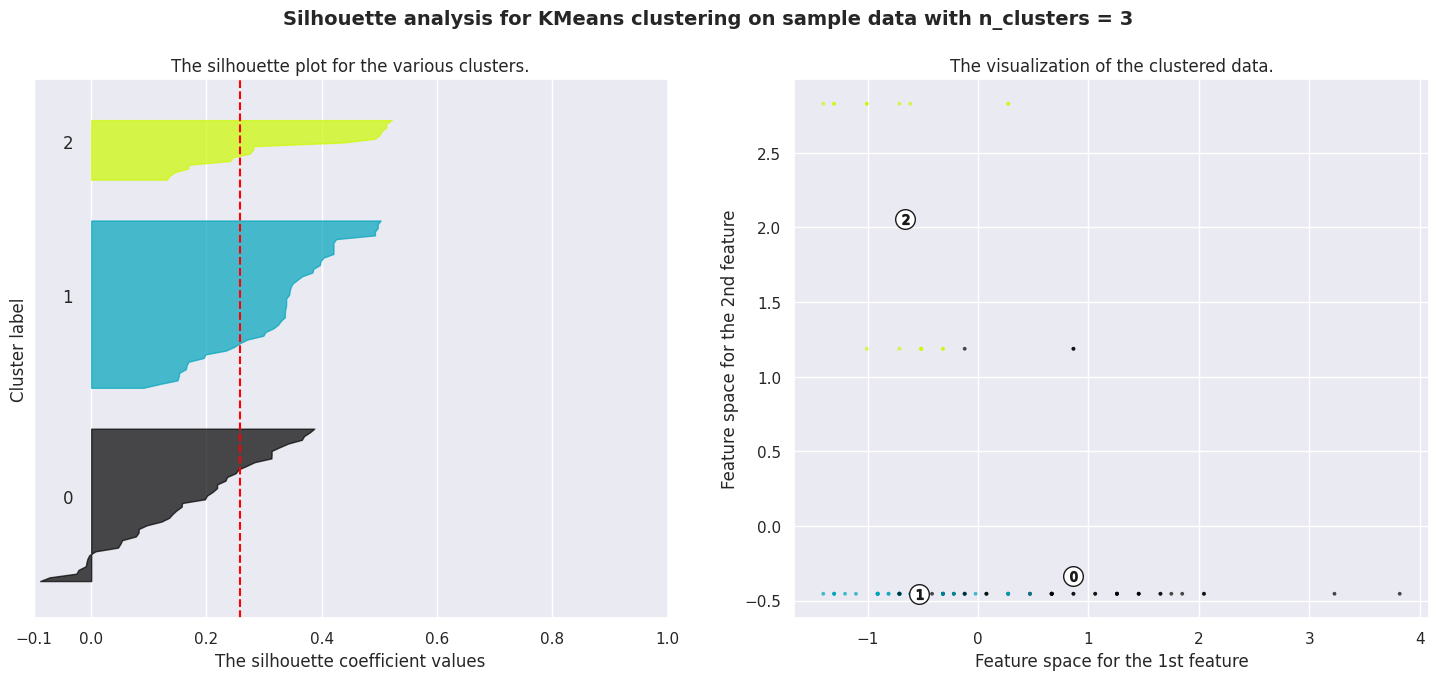

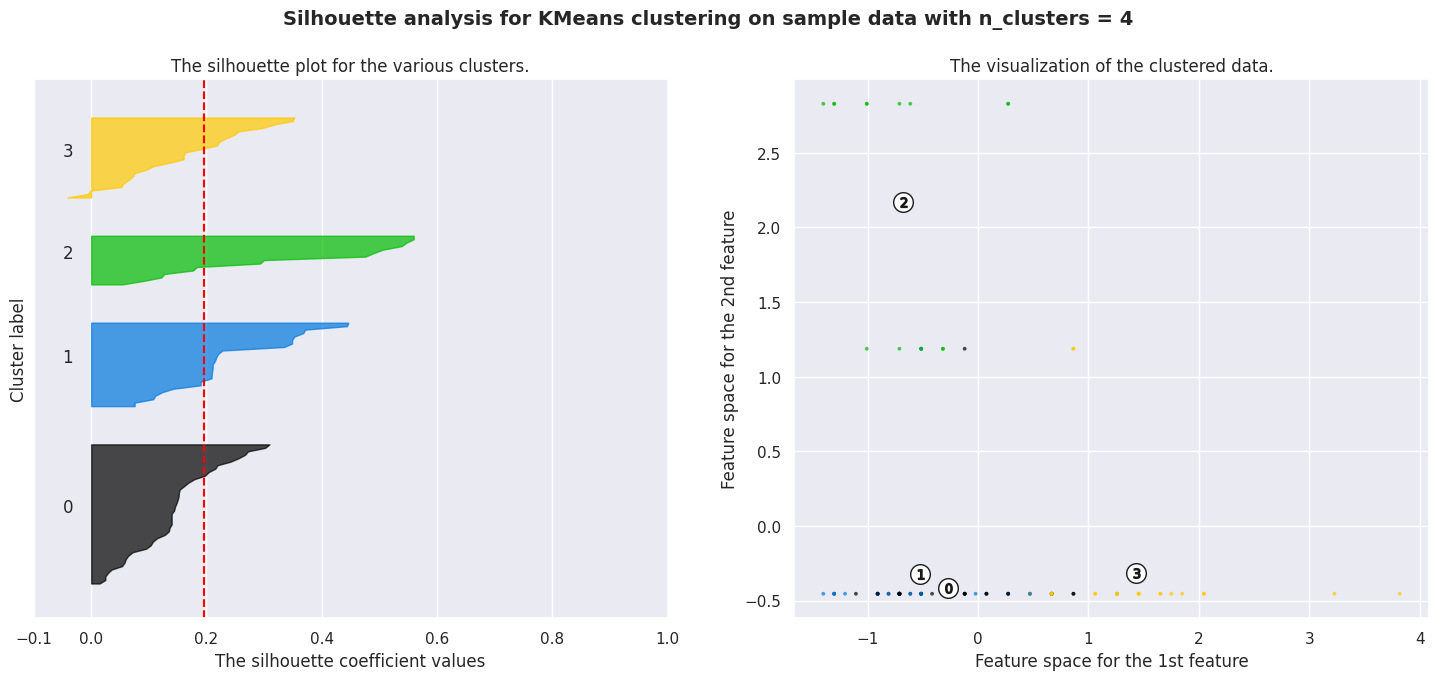

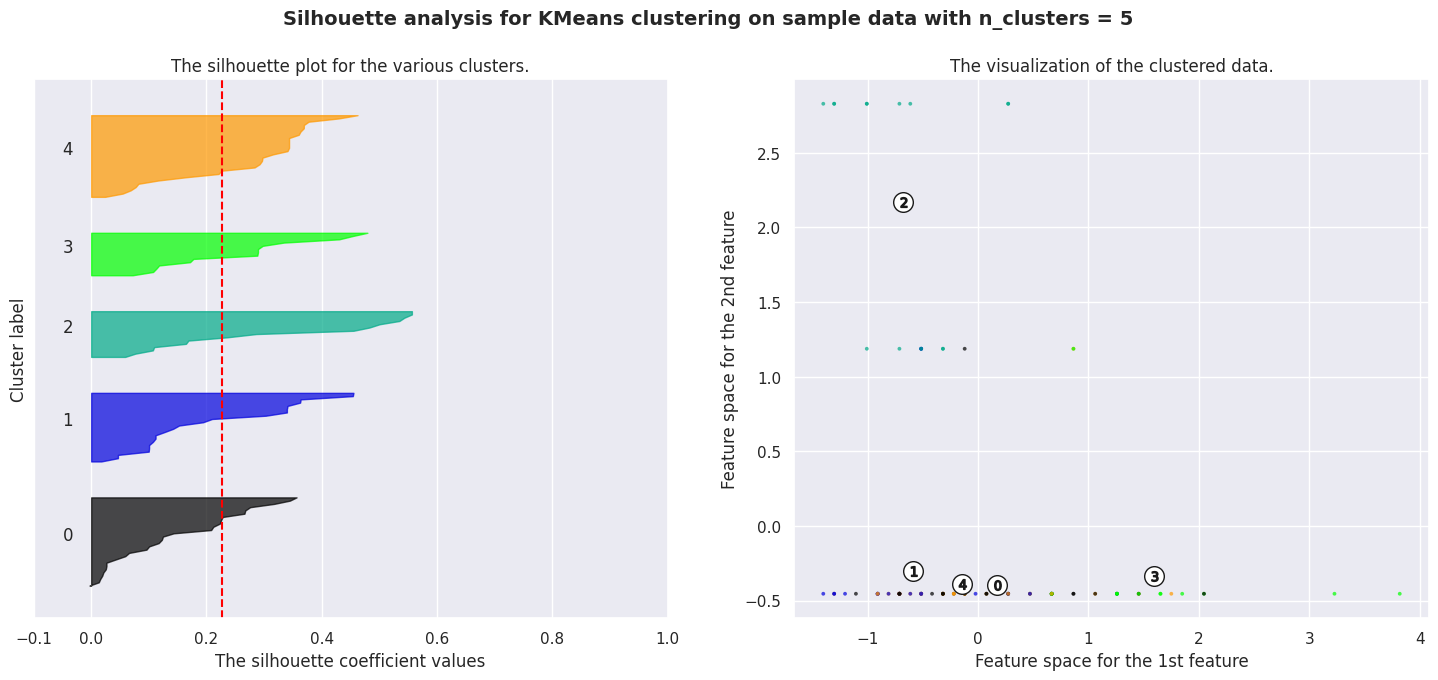

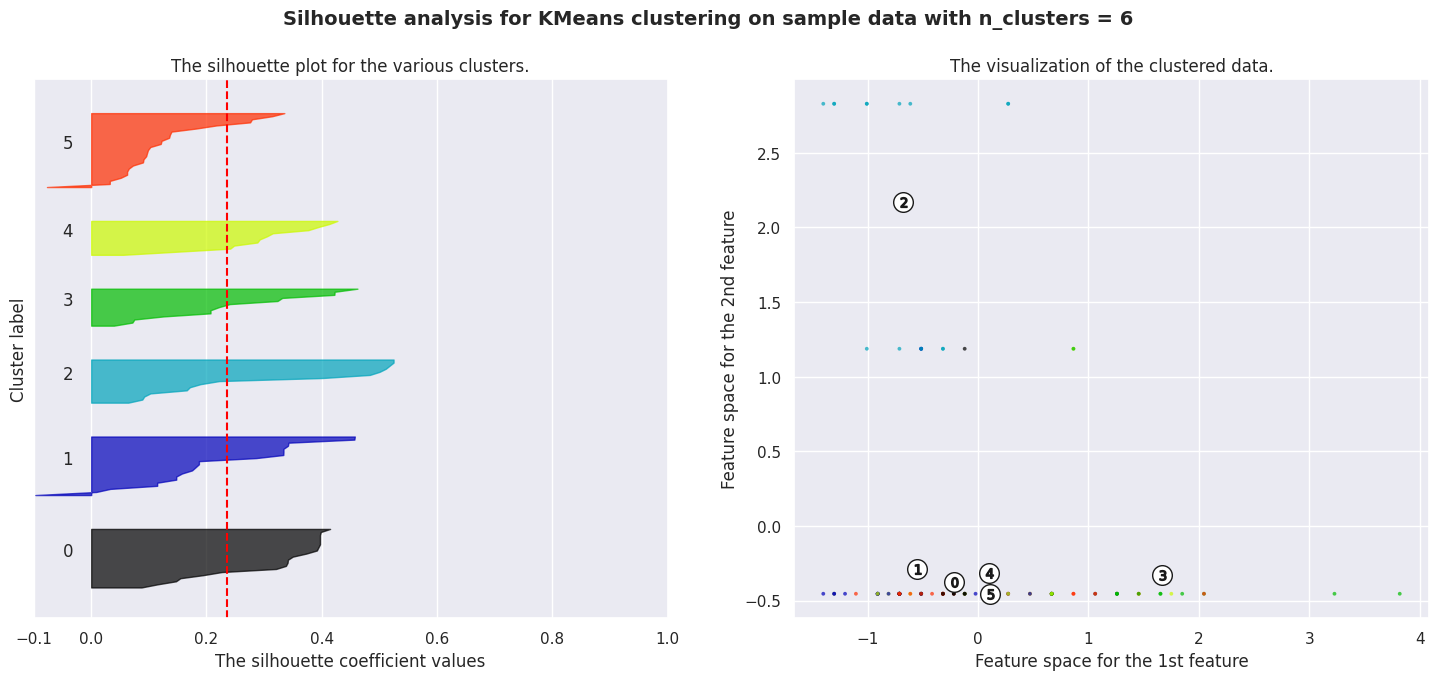

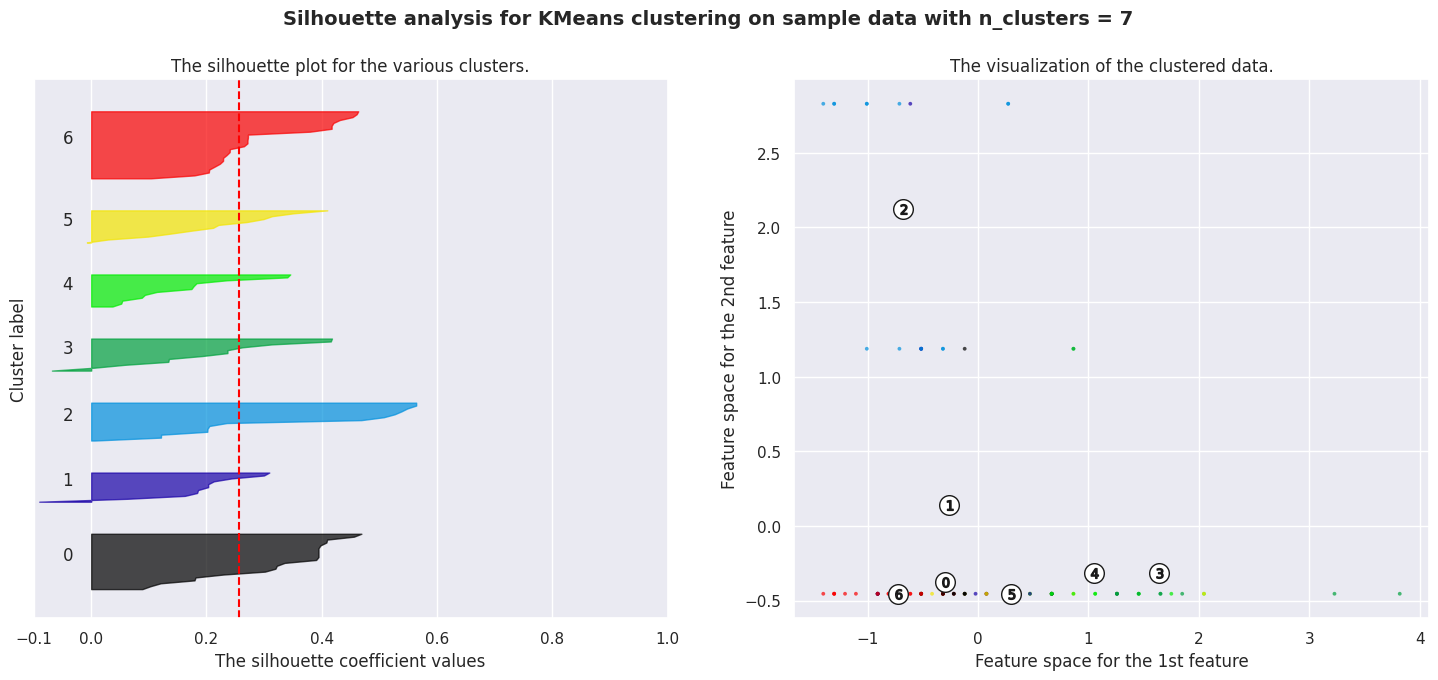

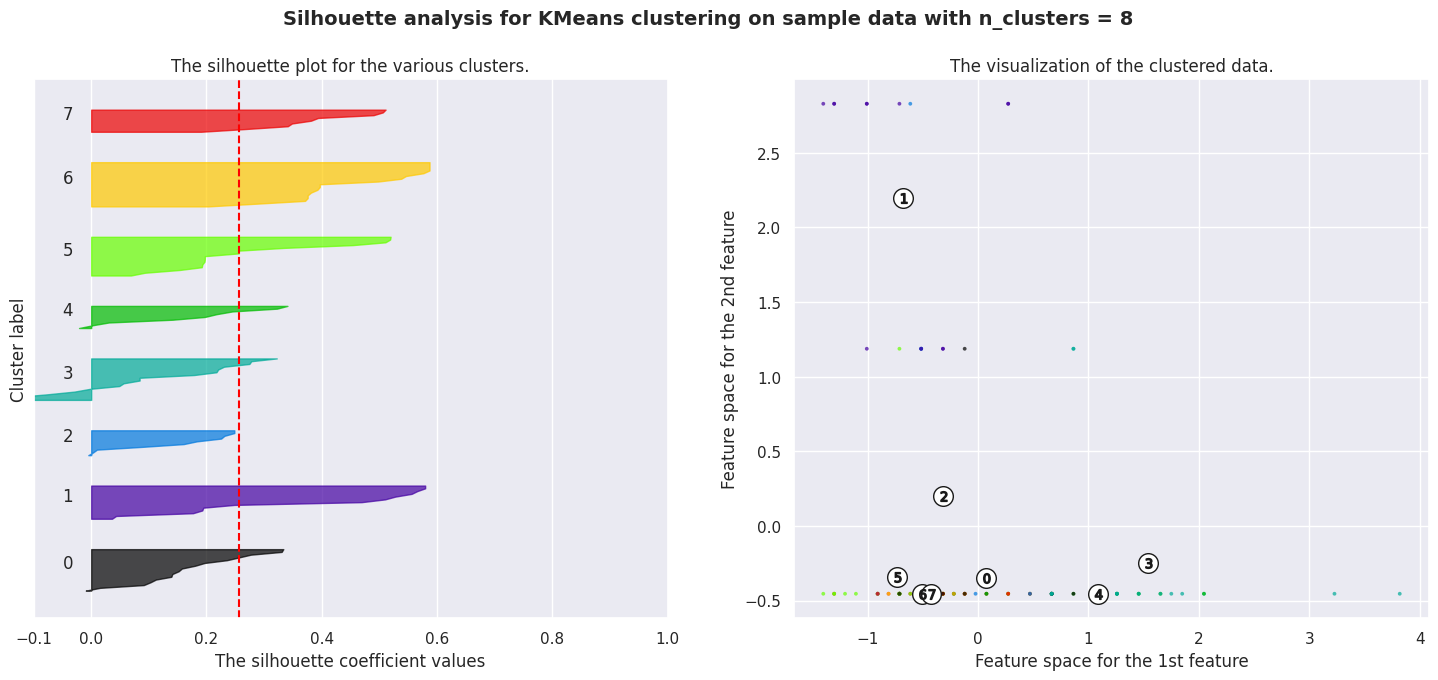

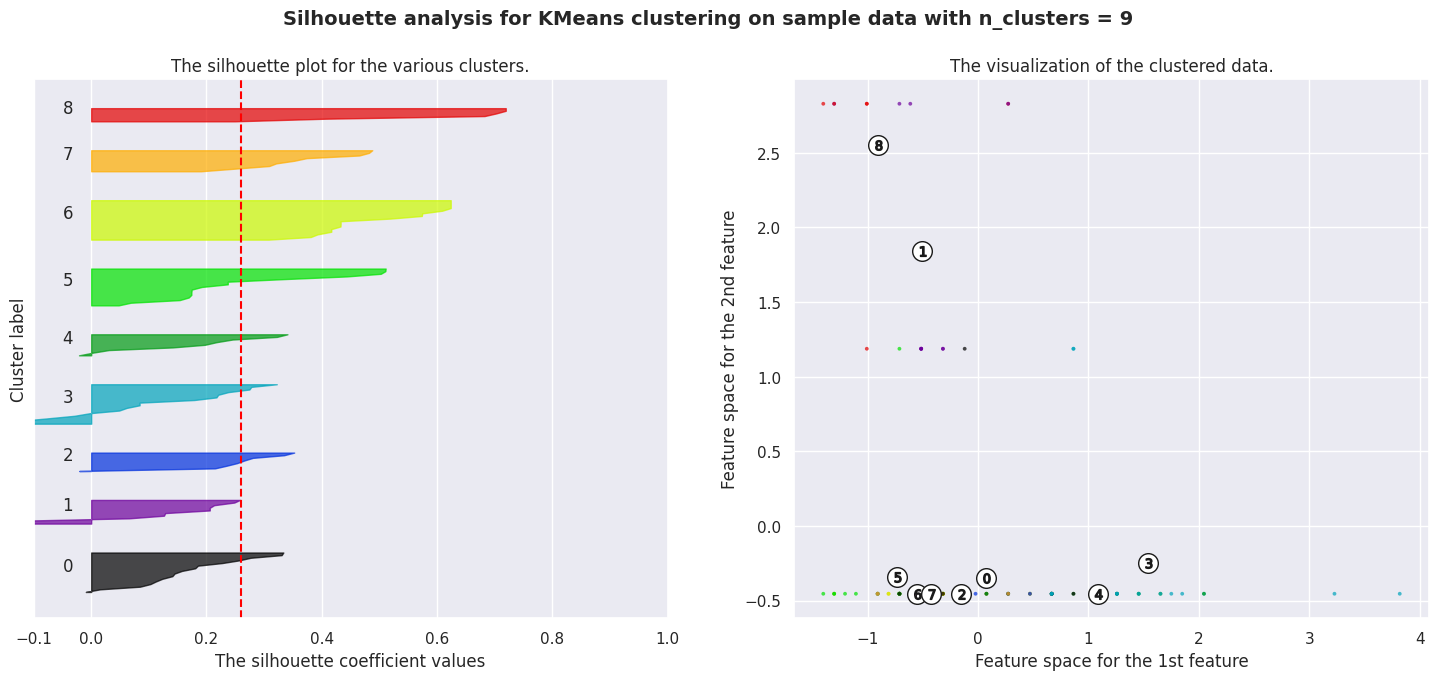

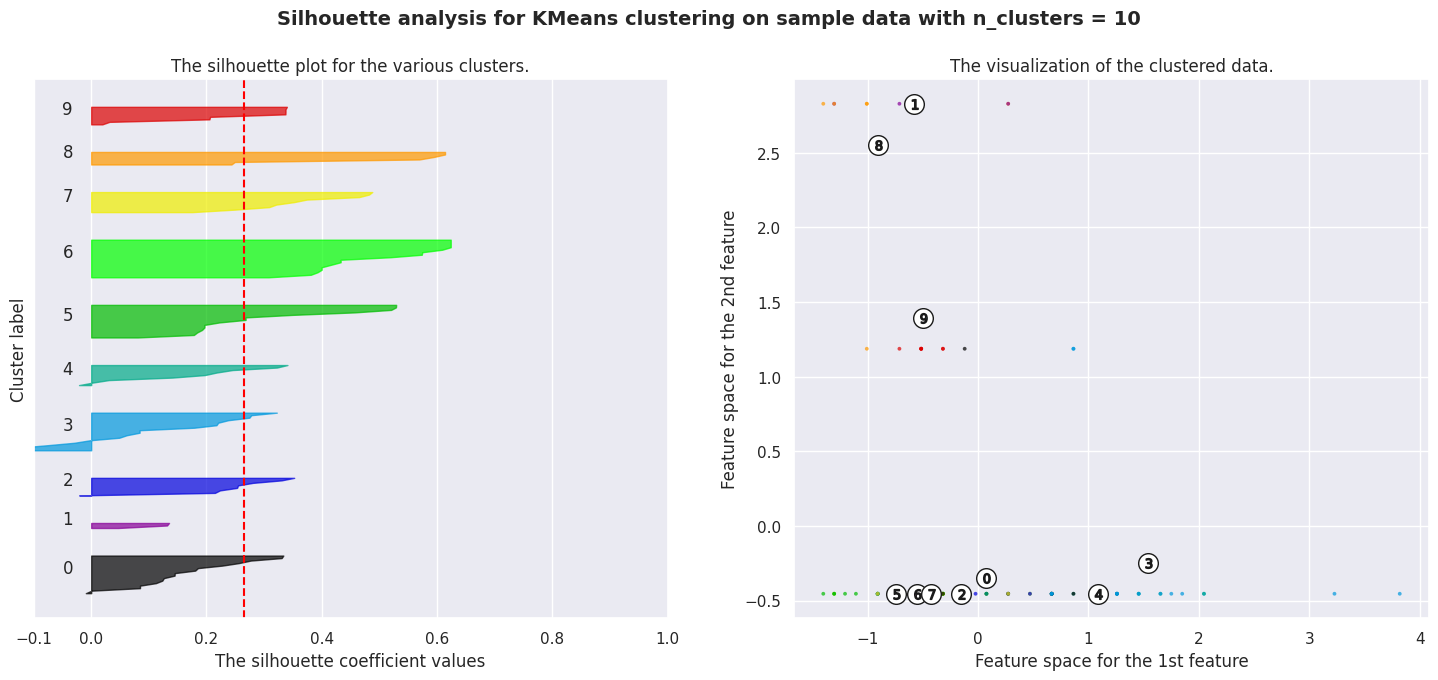

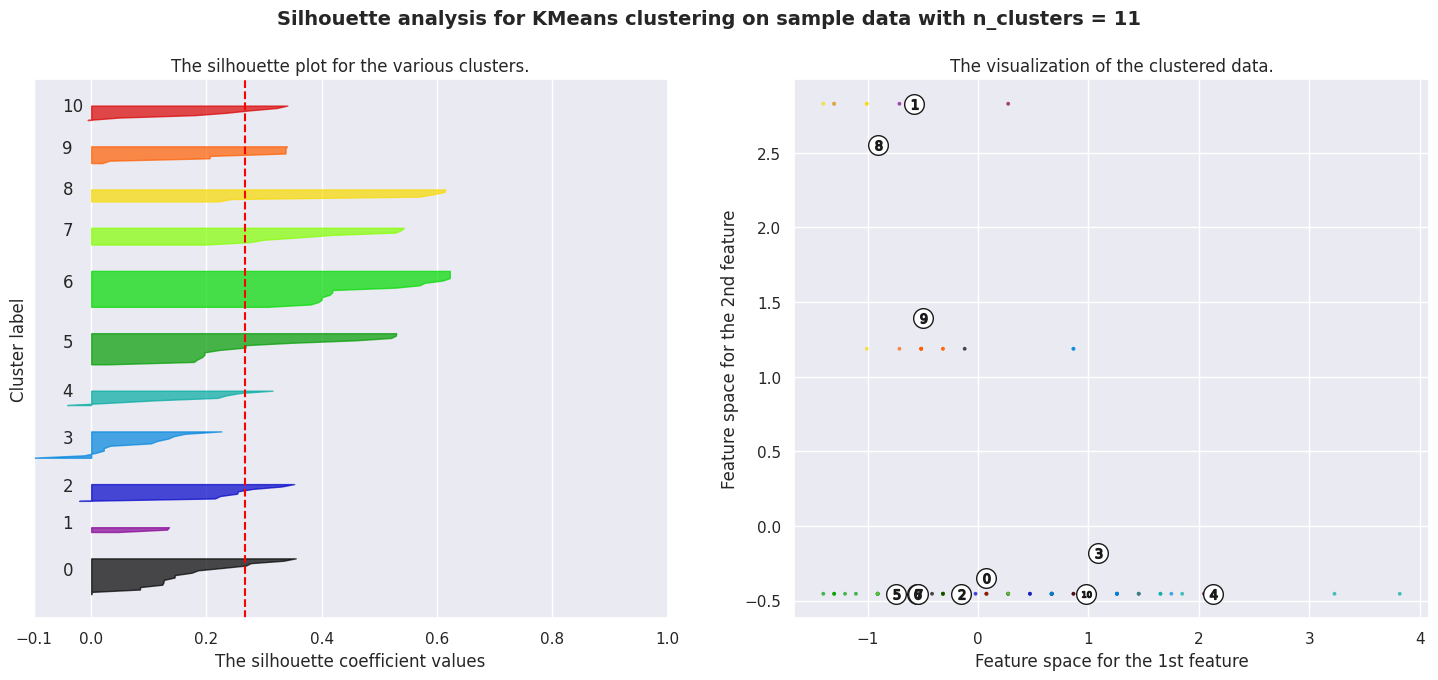

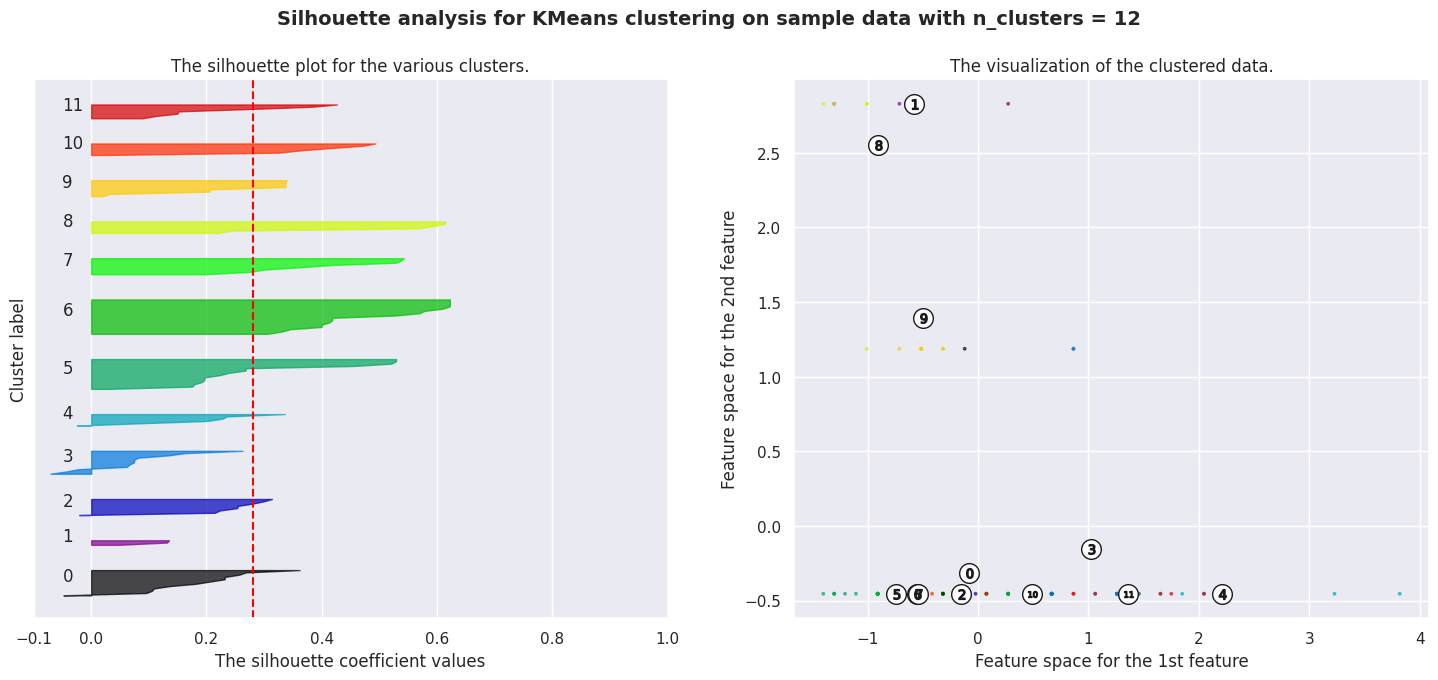

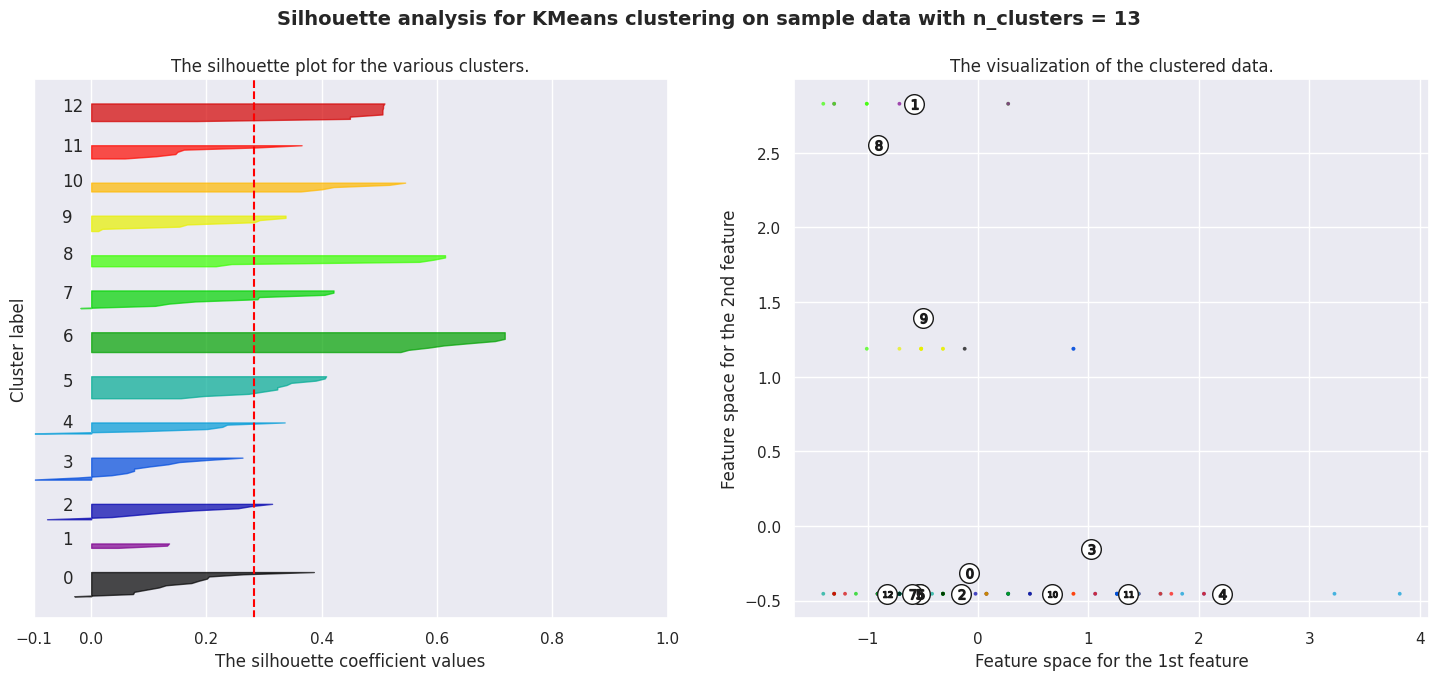

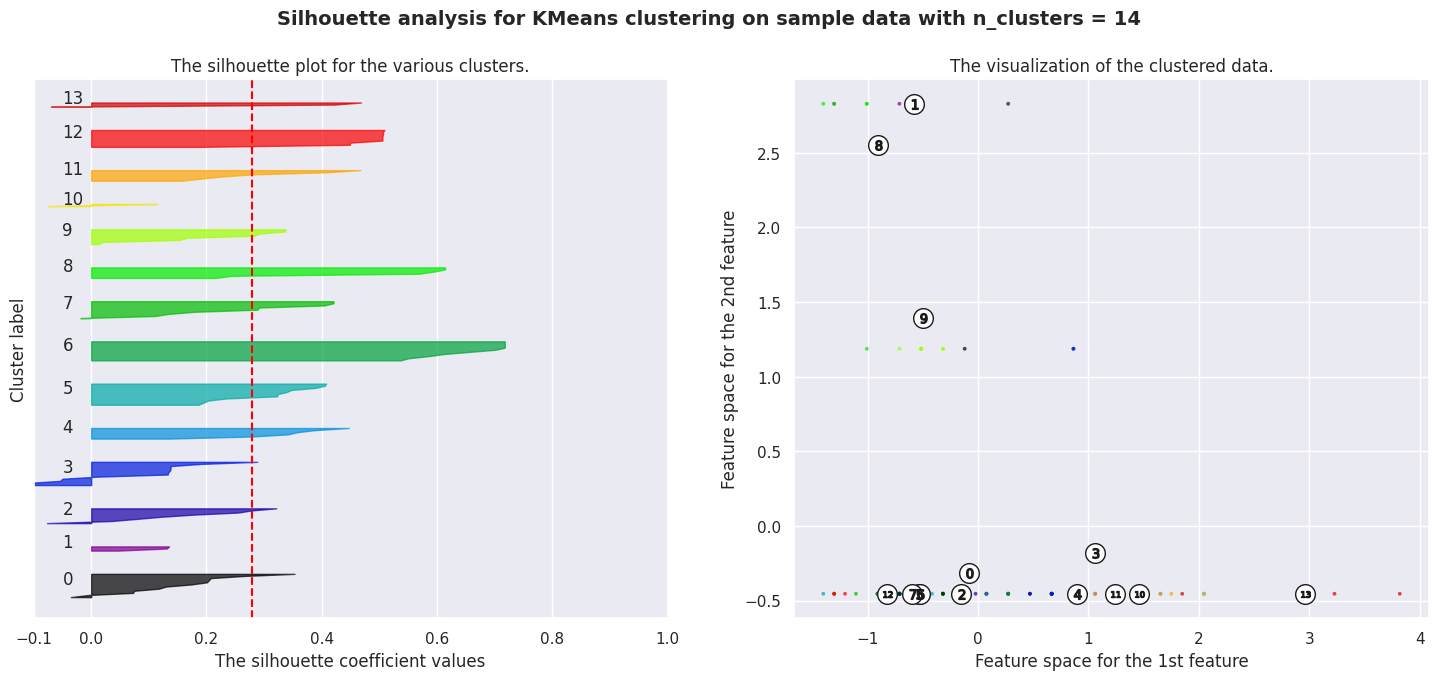

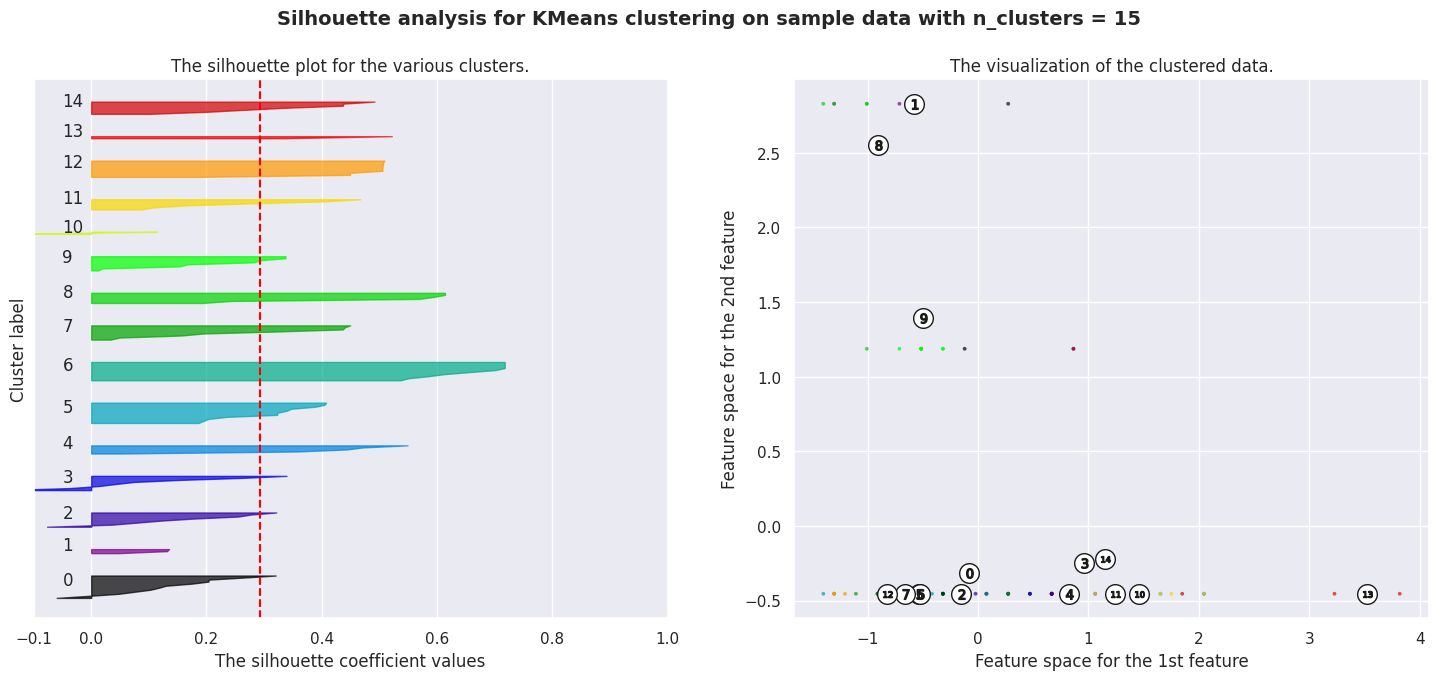

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

From silhouttee coefficients we are getting 3 as our optimum number of clusters

In [ ]:
# finding the predicted values bu kmeans
km = KMeans(n_clusters=3, n_init=1000, max_iter=500, random_state=1)
y_predicted = km.fit_predict(cluster_data_sc)
y_predicted

array([1, 2, 1, 1, 2, 1, 2, 0, 2, 1, 2, 2, 1, 1, 1, 2, 2, 1, 2, 0, 1, 2,
       2, 1, 0, 2, 0, 2, 2, 1, 2, 0, 0, 1, 0, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 1, 2, 0, 0, 0, 1, 2, 1, 2, 0, 2, 2, 1, 2, 2, 1, 2, 2,
       1, 1, 2, 2, 0, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 0, 2, 2, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1], dtype=int32)

In [ ]:
# finding the total numbers of labes in each cluster
pd.Series(km.labels_).value_counts()

2    46
1    42
0    17
Name: count, dtype: int64

In [ ]:
# updating the cluster values in df
cluster_df['cluster']=y_predicted
cluster_df['Cuisines'] = cluster_df['Cuisines'].apply(lambda x : x.split(", "))
exploded = cluster_df.explode("Cuisines")
exploded.head()

Name  Cost      Cuisines  cuisine_Dessert  \
0               10 Downing Street  1900  north indian                0   
0               10 Downing Street  1900       chinese                0   
0               10 Downing Street  1900   continental                0   
1                        13 Dhaba   450  north indian                0   
2  3B's - Buddies, Bar & Barbecue  1100  north indian                0   

   cuisine_Healthy food  cuisine_spicy food  cuisine_fast food  cluster  
0                     0                   2                  1        1  
0                     0                   2                  1        1  
0                     0                   2                  1        1  
1                     0                   1                  0        2  
2                     2                   1                  0        1

expracting the unique values from diffrent clusters

In [ ]:
exploded[exploded["cluster"]==0]['Cuisines'].unique()

array(['ice cream', 'desserts', 'cafe', 'bakery', 'continental',
       'fast food', 'beverages', 'burger', 'biryani', 'north indian',
       'mughlai', 'juices', 'chinese', 'mithai', 'american', 'wraps'],
      dtype=object)

In [ ]:
exploded[exploded["cluster"]==1]['Cuisines'].unique()

array(['north indian', 'chinese', 'continental', 'mediterranean',
       'european', 'seafood', 'biryani', 'hyderabadi', 'american',
       'south indian', 'andhra', 'kebab', 'bbq', 'italian', 'asian',
       'mughlai', 'beverages', 'modern indian', 'desserts', 'spanish',
       'japanese', 'salad', 'sushi', 'mexican', 'thai', 'malaysian',
       'indonesian', 'goan', 'finger food', 'healthy food'], dtype=object)

In [ ]:
exploded[exploded["cluster"]==2]['Cuisines'].unique()

array(['north indian', 'continental', 'american', 'chinese', 'fast food',
       'salad', 'burger', 'biryani', 'mughlai', 'asian', 'seafood',
       'momos', 'pizza', 'hyderabadi', 'japanese', 'sushi', 'finger food',
       'kebab', 'arabian', 'south indian', 'street food', 'lebanese',
       'andhra', 'thai', 'north eastern'], dtype=object)

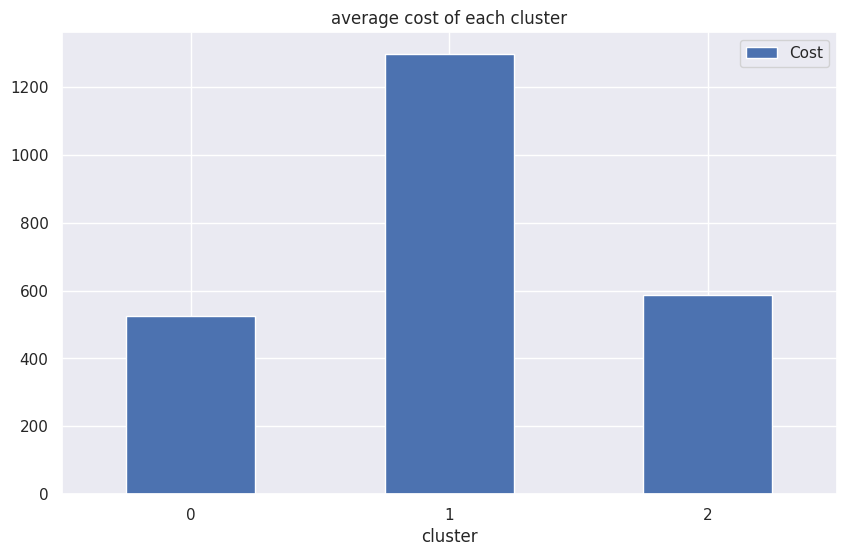

In [ ]:
# ploting average cost of each cluster
pd.DataFrame(cluster_df.groupby('cluster')['Cost'].mean()).plot(kind="bar")
plt.xticks(rotation=0)
plt.title('average cost of each cluster')
plt.show()

In [ ]:
cluster_df.loc[:,['Name','Cost','Cuisines','cluster']].head(30)

Name  Cost  \
0                         10 Downing Street  1900   
1                                  13 Dhaba   450   
2            3B's - Buddies, Bar & Barbecue  1100   
3                 AB's - Absolute Barbecues  1500   
4                         Absolute Sizzlers   750   
5                        Al Saba Restaurant   750   
6                       American Wild Wings   600   
7                                      Amul   150   
8                          Angaara Counts 3   500   
9                              Arena Eleven  1600   
10                             Aromas@11SIX   750   
11                           Asian Meal Box   200   
12                                   B-Dubs  1600   
13      Banana Leaf Multicuisine Restaurant   700   
14                          Barbeque Nation  1600   
15                          Behrouz Biryani   600   
16                             Being Hungry   450   
17                          Beyond Flavours   800   
18                        Biryanis And More   500   
19                               Cafe Eclat   700   
20  Cascade - Radisson Hyderabad Hitec City  1800   
21                         Chinese Pavilion  1000   
22                               Club Rogue   900   
23     Collage - Hyatt Hyderabad Gachibowli  2800   
24                              Cream Stone   350   
25                                 Delhi-39   600   
26                            Deli 9 Bistro   700   
27                               Desi Bytes   400   
28                             Dine O China   850   
29                          Diners Pavilion  1200   

                                             Cuisines  cluster  
0                [north indian, chinese, continental]        1  
1                                      [north indian]        2  
2             [north indian, mediterranean, european]        1  
3             [european, mediterranean, north indian]        1  
4                    [continental, american, chinese]        2  
5   [north indian, chinese, seafood, biryani, hyde...        1  
6                [american, fast food, salad, burger]        2  
7                               [ice cream, desserts]        0  
8                    [north indian, biryani, chinese]        2  
9                                       [continental]        1  
10          [north indian, chinese, mughlai, biryani]        2  
11                                            [asian]        2  
12                                         [american]        1  
13  [biryani, south indian, north indian, chinese,...        1  
14          [mediterranean, north indian, kebab, bbq]        1  
15                                 [mughlai, biryani]        2  
16                            [north indian, chinese]        2  
17  [chinese, continental, kebab, european, south ...        1  
18                   [north indian, biryani, chinese]        2  
19                                     [cafe, bakery]        0  
20        [north indian, italian, continental, asian]        1  
21                                 [chinese, seafood]        2  
22                          [north indian, fast food]        2  
23  [continental, italian, north indian, chinese, ...        1  
24                              [ice cream, desserts]        0  
25                            [north indian, chinese]        2  
26                      [cafe, continental, desserts]        0  
27                            [north indian, chinese]        2  
28                            [chinese, asian, momos]        2  
29                    [chinese, continental, italian]        1

## Herarchical Clustering

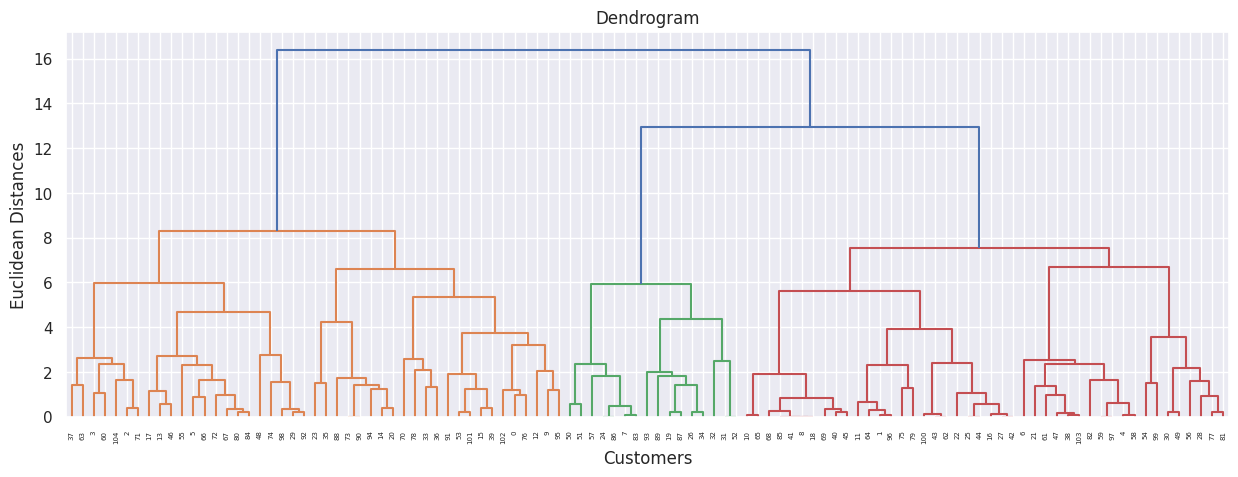

In [ ]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(15,5))
dendrogram = sch.dendrogram(sch.linkage(cluster_data_sc, method = 'ward'))

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')

plt.show() # find largest vertical distance we can make without crossing any other horizontal line

In [ ]:
# Fitting hierarchical clustering to the mall dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(cluster_data_sc)

TypeError: AgglomerativeClustering.__init__() got an unexpected keyword argument 'affinity'

In [ ]:
cluster_df['cluster_hr']=y_hc

In [ ]:
result=cluster_df.loc[:,['Name','Cost','Cuisines','cluster','cluster_hr']]

In [ ]:
result.head(20)

---
# Sentiment Analysis ( UnSupervised )
---

## Tokenization

In [ ]:
# setting tokens by TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer(stop_words=stop_word_list)
transformed_reviews=tfidf.fit_transform(reviews_df['Reviews'])

## LDA

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

In [ ]:
# Parameters tuning using Grid Search
from sklearn.model_selection import GridSearchCV

# LDA model
lda = LatentDirichletAllocation(n_components=5)
lda.fit(transformed_reviews)

In [ ]:
lda.components_

In [ ]:
# checking for top 15 words in each topic
for index,topic in enumerate(lda.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([tfidf.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

In [ ]:
!pip install pyLDAvis==2.1.2

In [ ]:
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

In [ ]:
# ploting the clusters top 30 terms
lda_panel = pyLDAvis.sklearn.prepare(lda, transformed_reviews,tfidf,mds='tsne')
lda_panel

In [ ]:
# predicting the sentiments and storing in a feature
topic_results = lda.transform(transformed_reviews)
reviews_df['sentiments']=topic_results.argmax(axis=1)
reviews_df.head()

In [ ]:
reviews_df['Rating'].value_counts()

In [ ]:
reviews_df.shape

In [ ]:
reviews_df[reviews_df['sentiments']==4 ]['Rating'].value_counts()

In [ ]:
reviews_df[reviews_df['sentiments']==3 ]['Rating'].value_counts()

In [ ]:
reviews_df[reviews_df['sentiments']==2 ]['Rating'].value_counts()

In [ ]:
reviews_df[reviews_df['sentiments']==1 ]['Rating'].value_counts()

In [ ]:
reviews_df[reviews_df['sentiments']==0 ]['Rating'].value_counts()

In [ ]:
reviews_df[reviews_df['Rating']==3].shape

observation :

## Non-negative matrix Factorization

In [ ]:
from sklearn.decomposition import NMF

In [ ]:
nmf_model = NMF(n_components=5,random_state=42)

In [ ]:
nmf_model.fit(transformed_reviews)

In [ ]:
# top most frequnt word used in each topic
for index,topic in enumerate(nmf_model.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([tfidf.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

In [ ]:
topic_results = nmf_model.transform(transformed_reviews)

In [ ]:
reviews_df['sentiments']=topic_results.argmax(axis=1)

In [ ]:
reviews_df[reviews_df['sentiments']==4]['Rating'].value_counts()

In [ ]:
reviews_df[reviews_df['sentiments']==3 ]['Rating'].value_counts()

In [ ]:
reviews_df.Reviews[1]

In [ ]:
reviews_df.head()

In [ ]:
reviews_df['sentiments']=reviews_df['sentiments'].apply( lambda x : 'negative' if x==4 or x==3 else 'positive')

In [ ]:
reviews_df[reviews_df['sentiments']=='negative']["Rating"].value_counts()

In [ ]:
reviews_df[reviews_df['sentiments']=='positive']["Rating"].value_counts()

---
# Sentiment Analysis (Superviesd)
---

---
## data Processing
---

In [ ]:
def sentiment(rating):
  if rating >=3.5:
    return 0
    # positive sentiment
  else:
    return 1
    # neagative sentiment

In [ ]:
sentiment_df=reviews_df[['Reviews','Rating']]

In [ ]:
sentiment_df['sentiment']=sentiment_df['Rating'].apply(lambda x:sentiment(x))
sentiment_df

In [ ]:
# defining blank list for the input of scores of models
model_accuracy=[]
model_precision=[]
model_recall=[]
model_f1_score=[]
model_roc_auc_score=[]
model_train_time=[]


In [ ]:
# making a function to train the model and evaluate the model
def train_and_score (model,X_test,X_train,y_test,y_train, best_parameter=True, best_score=True):
  '''
  train the model and gives mse,rmse,r2,adj r2 score of the model
  can be used for any model where y is not transformed
  '''

  #storing the start time of model training
  start=time.time()
  #training the model
  model.fit(X_train,y_train)
  #storing the time when the model ended trining
  stop = time.time()
  #calculating the total time taken for model training
  time_min=round((stop - start)/60,4)
  # printing the time taken to train the model
  print(f"Training time: {time_min}min")
  model_train_time.append(time_min)



  # finding the best parameters of the model if any
  if best_parameter==True:
    # using try except method to avoid any error
    try:
      print("The best parameters found out to be :" ,model.best_params_)
    except:
      pass
  # finding best score of the model
  if best_score==True:
    try:
      print(" \nwhere negative mean squared error is: ", model.best_score_,'\n')
    except:
      pass


  #predicting the values of y from x via model
  y_pred_test = model.predict(X_test)
  y_pred_train = model.predict(X_train)

  def score (actual,predicted,append=True):
    '''
    calcuating diffrent score matrix of the model
    '''
    # calculating accuracy score
    accuracy = accuracy_score(actual,predicted)
    # calculating precision score
    precision = precision_score(actual,predicted)
    # calculating recall score
    recall = recall_score(actual,predicted)
    # calculating f1_score score
    f1 = f1_score(actual,predicted)
    # calculating roc_auc_score score
    roc= roc_auc_score(actual,predicted)

    # printing all the scores
    print("\tThe accuracy is ", accuracy)
    print("\tThe precision is ", precision)
    print("\tThe recall is ", recall)
    print("\tThe f1 is ", f1)
    print('\tthe auc  is ',roc,'\n')
    print('\t\t\t\tclassification report\n','*'*80,'\n',classification_report(actual,predicted))


    # uploading all the score of the matrix in in the list
    if append==True:
      model_accuracy.append(accuracy)
      model_precision.append(precision)
      model_recall.append(recall)
      model_f1_score.append(f1)
      model_roc_auc_score.append(roc)
    else:
      pass
# printing the score by the help of coustom score function
  # for train set
  print('\t\t\t\tscore matrix for train')
  print('*'*80)
  score(y_train,y_pred_train,False)
  print('\n')
  # for test set
  print('\t\t\t\tscore matrix for test')
  print('*'*80)
  score(y_test,y_pred_test)


In [ ]:
# creating x and y varibles for independent and dependent variable
x = sentiment_df['Reviews']
y = sentiment_df['sentiment']

In [ ]:
# spliting the data into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.25,stratify=sentiment_df['sentiment'])

In [ ]:
# creating topkens for text data
from sklearn.feature_extraction.text import  TfidfVectorizer
vectorizer = TfidfVectorizer("english",min_df=0.01,max_df=0.95)
X_train= vectorizer.fit_transform(X_train)
X_test=vectorizer.transform(X_test)

---
## MultinomialNB
---

In [ ]:
from sklearn.naive_bayes import MultinomialNB
# creating MultinomialNB model
model = MultinomialNB()
# training and evaluating the MultinomialNB
train_and_score(model,X_test,X_train,y_test,y_train)

---
## Logestic Regrestion
---

In [ ]:
# creating DecisionTree model
# training and evaluating the DecisionTree

In [ ]:
from sklearn.linear_model import LogisticRegression
# creating LogisticRegression model
log_reg = LogisticRegression()

In [ ]:
# finding the best parameters for LogisticRegression by gridsearchcv
param_dict = {'C': [0.001,0.01,0.1,1,10,100],'penalty': ['l1', 'l2'],'max_iter':[1000]}
log_reg_grid = GridSearchCV(log_reg, param_dict,n_jobs=-1, cv=5, verbose = 5,scoring='recall')

In [ ]:
# training and evaluating the DecisionTree
train_and_score(log_reg_grid, X_test, X_train, y_test, y_train)

---
## Desision Tree
---

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# creating DecisionTree model
DecisionTree = DecisionTreeClassifier(max_depth=10,max_leaf_nodes=45,criterion='entropy')

# training and evaluating the DecisionTree
train_and_score(DecisionTree,X_test, X_train, y_test, y_train)

---
## Random forest
---

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# creating RandomForestRegressor model
rfc=RandomForestClassifier()

In [ ]:
rfc.get_params

In [ ]:
# finding the best parameters for knn_model by gridsearchcv
grid_values_rf = {'n_estimators': [100,125,150],'max_depth': [7,10,15],'criterion': ['entropy']}
rfc_grid = GridSearchCV(estimator=rfc,param_grid = grid_values_rf, scoring='recall',cv=5,verbose=5,n_jobs=-1)

In [ ]:
# training and evaluating the Random Forest Regressor
train_and_score(rfc_grid,X_train, X_test, y_train, y_test)

---
## XGboost
---

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgbc=XGBClassifier()

In [ ]:
# finding the best parameters for XGBRegressor by gridsearchcv
xgbc_param={'n_estimators': [100,125,150],'max_depth': [7,10,15],'criterion': ['entropy']}
xgbc_grid=GridSearchCV(estimator=xgbc,param_grid=xgbc_param,cv=3,scoring='recall',verbose=5,n_jobs=-1)

In [ ]:
# training and evaluating the xgb_grid
train_and_score(xgbc_grid,X_test, X_train, y_test, y_train)

---
## lightGBM
---

In [ ]:
import lightgbm as lgb

In [ ]:
lgbc=lgb.LGBMClassifier()

In [ ]:
# finding the best parameters for XGBRegressor by gridsearchcv
lgbc_para={'n_estimators': [100,125,150],'max_depth': [15,20,25]}
lgbc_grid=GridSearchCV(estimator=lgbc,param_grid=lgbc_para,cv=3,scoring='recall',verbose=5,n_jobs=-1)

In [ ]:
# training and evaluating the lgbr_grid
train_and_score(lgbc_grid,X_test, X_train, y_test, y_train)

---
## score matrix for all the models
---

In [ ]:
#creating dictionary to store all the metrices
dict={'accuracy':model_accuracy,'precision':model_precision,'recall':model_recall,'f1':model_f1_score,'roc_auc':model_roc_auc_score,'train_time':model_train_time}

In [ ]:
# list of all models
model_name=['MultinomialNB','Logestic Regrestion','Desision Tree','Random forest','XGboost','lightGBM',]

In [ ]:
# converting dictionary to dataframe
matrix_df=pd.DataFrame.from_dict(dict,orient="index",columns=model_name)

In [ ]:
# taking the transpose of the dataframe to make it more visual appealing
matrix_df=matrix_df.transpose().reset_index().rename(columns={'index':'Models'})

In [ ]:
matrix_df

In [ ]:
matrix_df.train_time.sum()

## ROC curve for all the models
---

In [ ]:
# finding the best parameters for all the models
log_reg_best=log_reg_grid.best_estimator_
rfc_best=rfc_grid.best_estimator_
xgbc_best=xgbc_grid.best_estimator_
lgbc_best=lgbc_grid.best_estimator_


In [ ]:
# predicting the sentiment by all models
y_preds_proba_mnbc = model.predict_proba(X_test)[::,1]
y_preds_proba_lr = log_reg_best.predict_proba(X_test)[::,1]
y_preds_proba_dtc = DecisionTree.predict_proba(X_test)[::,1]
y_preds_proba_rfc = rfc_best.predict_proba(X_test)[::,1]
y_preds_proba_xgbc = xgbc_best.predict_proba(X_test)[::,1]
y_preds_proba_lgbc = lgbc_best.predict_proba(X_test)[::,1]

In [ ]:
from sklearn.metrics import roc_curve

In [ ]:
classifiers_proba = [(model, y_preds_proba_mnbc),
                     (log_reg_best, y_preds_proba_lr),
                    (DecisionTree, y_preds_proba_dtc),
                    (rfc_best, y_preds_proba_rfc),
                    (xgbc_best, y_preds_proba_xgbc),
                    (lgbc_best, y_preds_proba_lgbc)]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for pair in classifiers_proba:

    fpr, tpr, _ = roc_curve(y_test,  pair[1])
    auc = roc_auc_score(y_test, pair[1])

    result_table = result_table.append({'classifiers':pair[0].__class__.__name__,
                                        'fpr':fpr,
                                        'tpr':tpr,
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

In [ ]:
# ploting the roc auc curve for all models
fig = plt.figure(figsize=(10,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'],
             result_table.loc[i]['tpr'],
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))

plt.plot([0,1], [0,1],'r--')

plt.xlabel("Flase Positive Rate", fontsize=15)

plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC AUC Curve', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()